In [1]:
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from statsmodels.stats.weightstats import DescrStatsW
import cellbell
import numdifftools

In [2]:
import lmfit as lf

In [3]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

# popc temperature series

In [4]:
# lipids = ['dppc', 'dspc', 'dopc', 'dlpc']
temps = ['283','293','303','313','323']

In [5]:
test_file = np.load('../popc-283/r1/py_output.npz')
test_file.f.arr_0

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [6]:
popc_all = pd.DataFrame()

for temp in temps:
    for r in range(1,6):
        filename = f'../popc-{temp}/r{r}/py_output.npz'
        quick = np.load(filename)
        popc_all[temp+'-r'+str(r)+'-auto'] = np.array(quick.f.arr_2)
        popc_all[temp+'-r'+str(r)+'-visc'] = np.array(quick.f.arr_3)
popc_all['times'] = np.array(quick.f.arr_1)
popc_all

,283-r1-auto,283-r1-visc,283-r2-auto,283-r2-visc,283-r3-auto,283-r3-visc,283-r4-auto,283-r4-visc,283-r5-auto,283-r5-visc,...,323-r1-visc,323-r2-auto,323-r2-visc,323-r3-auto,323-r3-visc,323-r4-auto,323-r4-visc,323-r5-auto,323-r5-visc,times
0,9420.688502,-2.191391e-12,9461.082226,-2.159564e-12,9423.175335,-2.194980e-12,9462.913427,-2.149669e-12,9443.937213,-2.150289e-12,...,-1.462409e-12,9997.489852,-1.460759e-12,10013.417577,-1.451362e-12,10012.543186,-1.454144e-12,10012.114904,-1.452965e-12,0.014
1,697.485314,9.994029e-13,708.966264,1.014629e-12,711.807201,1.024031e-12,694.987166,9.854118e-13,707.959918,1.014132e-12,...,1.154222e-12,633.844413,1.162524e-12,630.896885,1.156600e-12,628.474006,1.149245e-12,632.892166,1.167604e-12,0.162
2,558.254946,2.469237e-12,558.088140,2.491047e-12,569.397267,2.502883e-12,558.122589,2.426274e-12,563.127904,2.482930e-12,...,2.188382e-12,393.677783,2.208098e-12,393.192890,2.194828e-12,384.787482,2.174376e-12,389.634784,2.208401e-12,0.310
3,421.516093,3.420531e-12,422.716115,3.456883e-12,423.537556,3.467364e-12,417.631983,3.363145e-12,419.920258,3.435850e-12,...,2.797042e-12,372.233493,2.824107e-12,367.066866,2.801060e-12,364.996679,2.766826e-12,371.853826,2.812212e-12,0.458
4,202.623161,4.251937e-12,204.410680,4.299076e-12,202.735176,4.301711e-12,200.074150,4.169801e-12,208.863263,4.261907e-12,...,3.298835e-12,124.021951,3.335767e-12,118.746008,3.309669e-12,117.648848,3.267525e-12,120.045158,3.314858e-12,0.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013509,-3132.758533,6.526549e-10,-309.738511,-4.898902e-11,-1400.586657,-5.155263e-10,-790.466127,-1.423686e-10,389.967733,-1.365788e-09,...,2.973391e-10,-1204.965918,2.386264e-10,-1500.385508,-2.155816e-10,197.029014,-1.339013e-10,1609.830642,-3.750177e-10,149999.346
1013510,591.119769,6.562833e-10,-1435.092589,-5.354230e-11,1746.895789,-5.158010e-10,513.873429,-1.412776e-10,-2863.672109,-1.365141e-09,...,2.952292e-10,-2352.407565,2.356193e-10,-1775.805097,-2.175436e-10,2208.730505,-1.340160e-10,-2673.082861,-3.724640e-10,149999.494
1013511,1266.276488,6.545224e-10,-2028.707017,-5.986626e-11,-392.126819,-5.159044e-10,804.513455,-1.423384e-10,175.522052,-1.363374e-09,...,2.967585e-10,1067.572625,2.355442e-10,2797.303431,-2.135502e-10,537.366640,-1.341049e-10,3794.575958,-3.715122e-10,149999.642
1013512,496.237881,6.550086e-10,-1425.564414,-6.381153e-11,3406.092652,-5.151292e-10,222.647838,-1.403525e-10,-3017.455867,-1.361435e-09,...,3.032259e-10,67.067386,2.368782e-10,3320.005561,-2.172754e-10,1845.757506,-1.356010e-10,642.711495,-3.736459e-10,149999.790


In [7]:
# for temp in temps:
#     plt.figure(figsize=(4,2))
#     for r in range(1,6):
#         plt.subplot(121)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-auto'])
#         plt.subplot(122)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-visc'])
#         plt.show()

In [8]:
# for temp in temps:
#     for r in range(1,6):
#         plt.figure(figsize=(4,2))
#         plt.subplot(121)
#         plt.plot(popc_all.times, popc_all[temp+'-r'+str(r)+'-auto'])
#         plt.subplot(122)
#         plt.plot(popc_all.times, popc_all[temp+'-r'+str(r)+'-visc'])
#         plt.show()

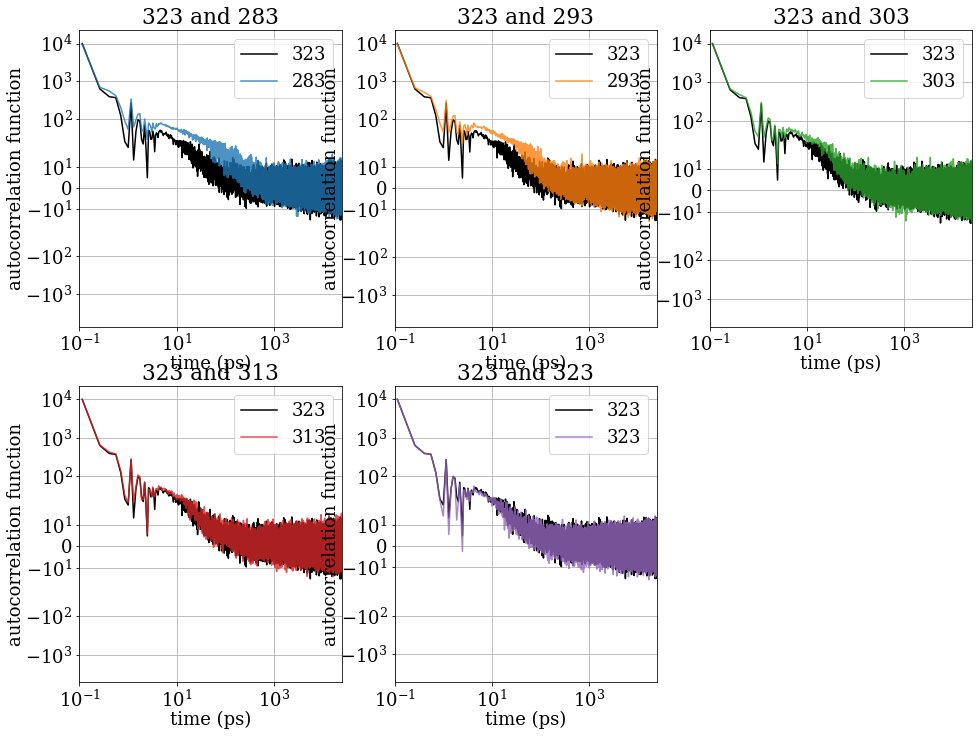

In [9]:
plt.figure(figsize=(16,12))
for l, temp in enumerate(temps):
    plt.subplot(2,3,l+1)
    plt.title('323 and '+temp)
    plt.plot(popc_all.times+0.1, popc_all['323-r2-auto'], c='k', label = '323')
    plt.plot(popc_all.times+0.1, popc_all[temp+'-r1-auto'], c=f'C{l}', label = temp, alpha=0.8)
    
#     plt.xlim(0,700000)
    
    ### Lin Y #########
#     plt.ylim(-0.3e-10,2.5e-10)
    ###################
    
    ### Log Y ##########
#     plt.yscale('log')
#     plt.ylim(5e-12,1e-9)
    ####################

#     plt.legend(loc=1)
    plt.xlabel('time (ps)', labelpad=0)
    plt.ylabel('autocorrelation function', labelpad=0)
    
    plt.legend(loc='upper right')
    plt.xlim(0.1, 25e3)
    plt.xscale('log')
    plt.yscale('symlog', linthreshy = 20)
    plt.grid(True)
plt.show()

In [10]:
for temp in temps:
    popc_all[temp+'-mean'] = np.mean(popc_all.filter(regex=temp+'-r.-visc'),axis=1)
    popc_all[temp+'-std'] = np.std(popc_all.filter(regex=temp+'-r.-visc'),axis=1)

283
	r 1
	r 2
	r 3
	r 4
	r 5
293
	r 1
	r 2
	r 3
	r 4
	r 5
303
	r 1
	r 2
	r 3
	r 4
	r 5
313
	r 1
	r 2
	r 3
	r 4
	r 5
323
	r 1
	r 2
	r 3
	r 4
	r 5


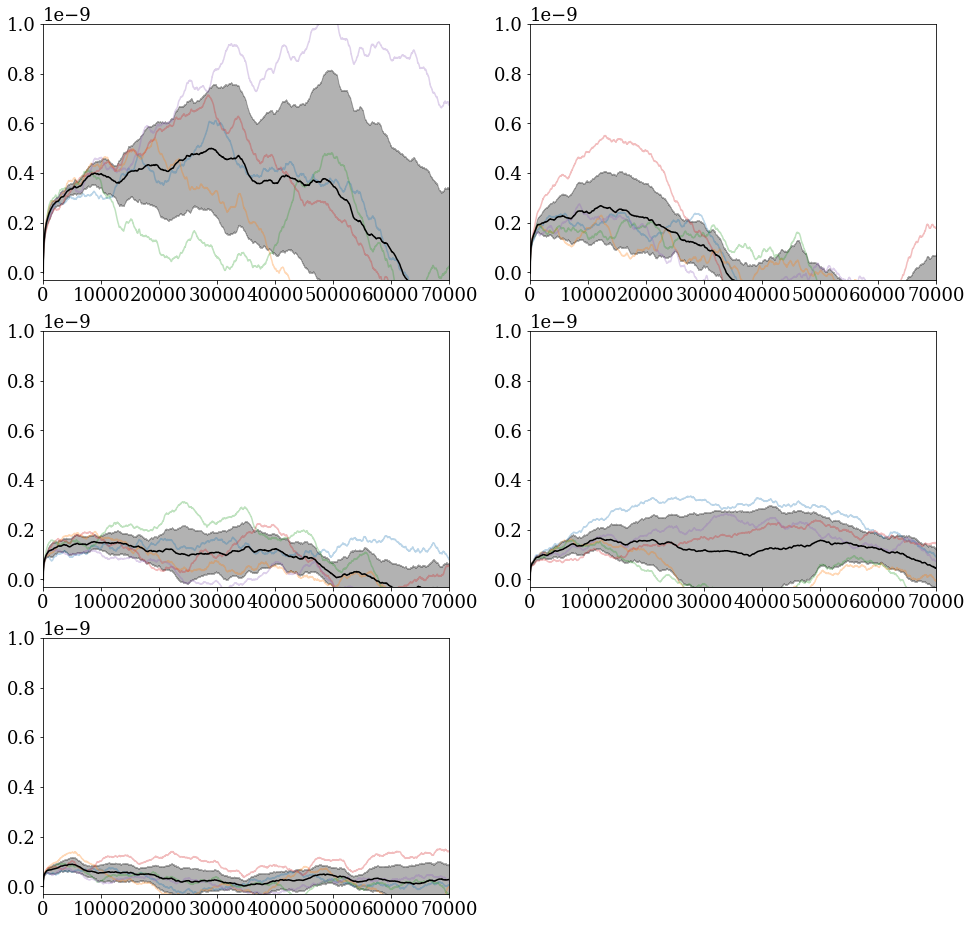

In [11]:
plt.figure(figsize=(16,16))
for l, temp in enumerate(temps):
    print(temp)
    plt.subplot(3, 2, l+1)
    for r in range(1,6):
        print('\tr',r)
        plt.plot(popc_all.times, popc_all[temp+'-r'+str(r)+'-visc'], alpha=0.3, label=f'r{r}')
    plt.plot(popc_all.times, popc_all[temp+'-mean'], c='k', alpha=1)
    plt.fill_between(x = popc_all.times,
                     y1 = popc_all[temp+'-mean']+popc_all[temp+'-std'],
                     y2 = popc_all[temp+'-mean']-popc_all[temp+'-std'],
                     color = 'k', alpha=0.3
                    )
    
    plt.xlim(0,70000)
    
    ### Lin Y #########
    plt.ylim(-0.3e-10,1e-9)
    ###################
    
    ### Log Y ##########
#     plt.yscale('log')
#     plt.ylim(5e-12,1e-9)
    ####################

#     plt.legend(loc=1)
plt.show()

.

.

.

.

# --------------------

.

.


## popc temp-series averaging window

In [12]:
# print(data['times'][1]-data['times'][0])

In [13]:
# data['times'][np.ceil(20000/0.148)]

In [14]:
thistemp = '313'
peak_index = np.argmax(popc_all[thistemp+'-mean'][0:int(50000/0.148)])

In [15]:
print('the maximum of',thistemp,'mean is at STEP NUMBER:')
print(peak_index)

the maximum of 313 mean is at STEP NUMBER:
81706


In [16]:
quick_mean = popc_all[thistemp+'-mean']
quick_std = popc_all[thistemp+'-std']

leftl = 0
leftr = min(peak_index, len(quick_mean)//10)

rightl = peak_index
rightr = len(quick_mean)//5

split_into = 120
left_skipping = (leftr-leftl)//split_into
right_skipping = (rightr-rightl)//split_into

print(left_skipping, right_skipping)

sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/left_skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/right_skipping
        )
    )
))

means = np.zeros_like(sems)

print(sems.shape)

for i, start in enumerate(range(leftl, leftr, left_skipping)):
    for j, stop in enumerate(range(rightl, rightr, right_skipping)):
        if i==0: print('j:', j, end=" ")
        if start+3378 < stop:
            stat = DescrStatsW(
                quick_mean[start:stop], 
#                 weights=quick_std[start:stop]**(-2)*np.arange(start,stop)**2
            )
            sems[i,j] = stat.std/(stop-start)
            means[i,j] = stat.mean
        else:
            print('scream')
#     if i%7==0:
    print('i:', i, end=" ")

means = np.ma.masked_equal(means, 0)
sems = np.ma.masked_equal(sems, 0)


680 1008
(121, 121)
j: 0 j: 1 j: 2 j: 3 j: 4 j: 5 j: 6 j: 7 j: 8 j: 9 j: 10 j: 11 j: 12 j: 13 j: 14 j: 15 j: 16 j: 17 j: 18 j: 19 j: 20 j: 21 j: 22 j: 23 j: 24 j: 25 j: 26 j: 27 j: 28 j: 29 j: 30 j: 31 j: 32 j: 33 j: 34 j: 35 j: 36 j: 37 j: 38 j: 39 j: 40 j: 41 j: 42 j: 43 j: 44 j: 45 j: 46 j: 47 j: 48 j: 49 j: 50 j: 51 j: 52 j: 53 j: 54 j: 55 j: 56 j: 57 j: 58 j: 59 j: 60 j: 61 j: 62 j: 63 j: 64 j: 65 j: 66 j: 67 j: 68 j: 69 j: 70 j: 71 j: 72 j: 73 j: 74 j: 75 j: 76 j: 77 j: 78 j: 79 j: 80 j: 81 j: 82 j: 83 j: 84 j: 85 j: 86 j: 87 j: 88 j: 89 j: 90 j: 91 j: 92 j: 93 j: 94 j: 95 j: 96 j: 97 j: 98 j: 99 j: 100 j: 101 j: 102 j: 103 j: 104 j: 105 j: 106 j: 107 j: 108 j: 109 j: 110 j: 111 j: 112 j: 113 j: 114 j: 115 j: 116 j: 117 j: 118 j: 119 j: 120 i: 0 i: 1 i: 2 i: 3 i: 4 i: 5 i: 6 i: 7 i: 8 i: 9 i: 10 i: 11 i: 12 i: 13 i: 14 i: 15 i: 16 i: 17 i: 18 i: 19 i: 20 i: 21 i: 22 i: 23 i: 24 i: 25 i: 26 i: 27 i: 28 i: 29 i: 30 i: 31 i: 32 i: 33 i: 34 i: 35 i: 36 i: 37 i: 38 i: 39 i: 40 i: 41 i

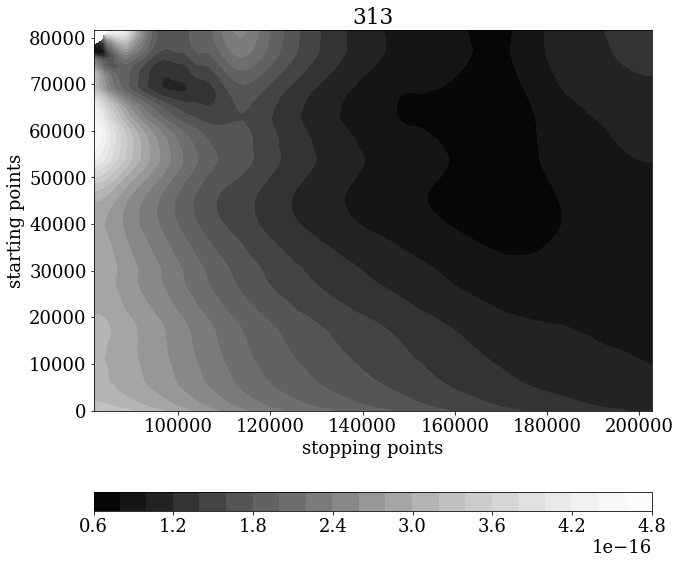

In [17]:
# levels = 6

lefts = np.arange(leftl, leftr, left_skipping)
rights = np.arange(rightl, rightr, right_skipping)

plt.figure(figsize=(10, 10))
plt.title(thistemp)

# plt.contourf(x, y, means, cmap='Greys_r', levels = 30)
# plt.colorbar(orientation = 'horizontal', aspect=30)

plt.contourf(
    rights, lefts, sems, cmap='Greys_r',
    levels = 20
            )
plt.colorbar(orientation = 'horizontal', aspect=30)

plt.xlabel('stopping points')
plt.ylabel('starting points')

plt.show()

93 86


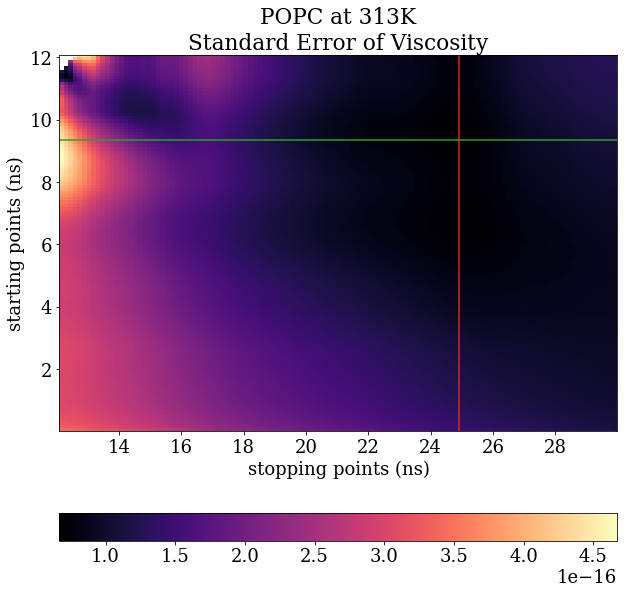

In [18]:
bestleft, bestright = np.unravel_index(np.argmin(sems, axis=None), sems.shape)
print(bestleft, bestright)

plt.figure(figsize=(10,10))

plt.imshow(sems, cmap='magma',
           extent=[
               popc_all.times[rights[0]]/1e3, popc_all.times[rights[-1]]/1e3,
               popc_all.times[lefts[0]]/1e3, popc_all.times[lefts[-1]]/1e3
           ],
           origin='lower'
          )
plt.colorbar(orientation = 'horizontal')

plt.xlabel('stopping points (ns)')
plt.ylabel('starting points (ns)')

plt.axvline(popc_all.times[rights[bestright]]/1e3, c='C3')
plt.axhline(popc_all.times[lefts[bestleft]]/1e3,  c='C2')

plt.title('POPC at '+thistemp+'K\nStandard Error of Viscosity')

plt.show()

In [19]:
print(popc_all.times[leftl], popc_all.times[lefts[bestleft]], popc_all.times[leftr])
print(popc_all.times[rightl], popc_all.times[rights[bestright]], popc_all.times[rightr])

0.014 9359.534 12092.502
12092.502 24922.326 29999.91


In [20]:
print(popc_all.times[leftl], popc_all.times[lefts[bestleft]], popc_all.times[leftr])
print(popc_all.times[rightl], popc_all.times[rights[bestright]], popc_all.times[rightr])

0.014 9359.534 12092.502
12092.502 24922.326 29999.91


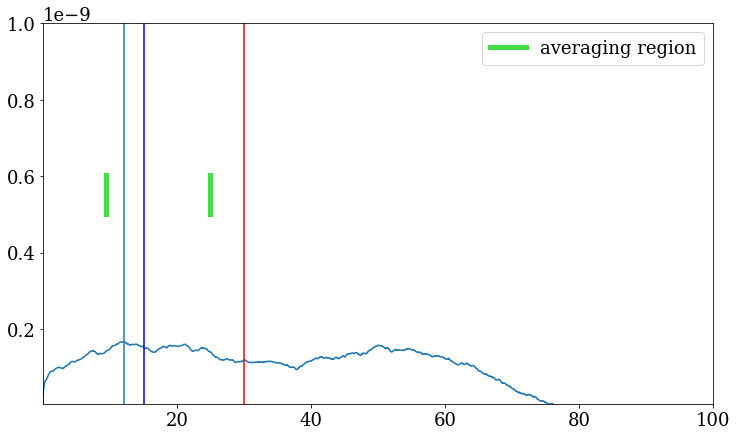

In [21]:
plt.figure(figsize=(12,7))

plt.plot(popc_all.times/1e3, popc_all[thistemp+'-mean'])

# for r in range(1,6):
#     plt.plot(popc_all.times, popc_all[thistemp+'-r'+str(r)+'-visc'])

# plt.axvline(data.times[lefts[41]], ymin=0, ymax = 0.1, c='#f34648', label='p=0, 0.5')
# plt.axvline(data.times[rights[0]], ymin=0, ymax = 0.1, c='#f34648')

plt.axvline(popc_all.times[lefts[bestleft]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
            linewidth = 5, label='averaging region')
plt.axvline(popc_all.times[rights[bestright]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
            linewidth = 5, )

# plt.axvline(data.times[lefts[12]], ymin=0.2, ymax = 0.3, c='#9e8431', label='p=1.5')
# plt.axvline(data.times[rights[21]], ymin=0.2, ymax = 0.3, c='#9e8431')

plt.axvline(popc_all.times[peak_index]/1e3)
plt.axvline(popc_all.times[len(popc_all.times)//10]/1e3, c='b')
plt.axvline(popc_all.times[len(popc_all.times)//5]/1e3, c='r')


# plt.xlim(-1000,71000)
# plt.xscale('log')
plt.xlim(1e-3,1e2)

# plt.ylim(-0.1e-10,2e-10)
# plt.yscale('log')
plt.ylim(4e-12, 1e-9)

plt.legend(loc='upper right')

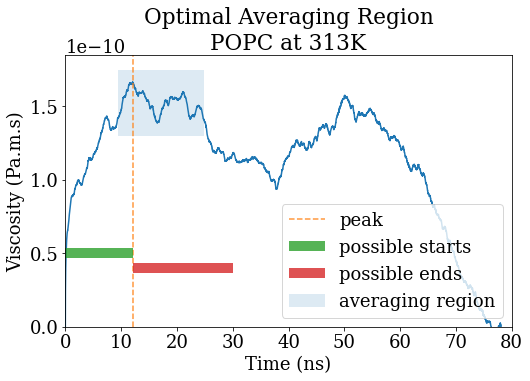

In [22]:
plt.figure(figsize=(8,5))

plt.plot(popc_all.times/1e3, popc_all[thistemp+'-mean'])

# plt.axvline(popc_all.times[lefts[bestleft]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
#             linewidth = 5, label='averaging region')
# plt.axvline(popc_all.times[rights[bestright]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
#             linewidth = 5, )

plt.axvline(popc_all.times[peak_index]/1e3, label='peak', c='C1', alpha=0.8, ls='--')
# plt.axvline(popc_all.times[len(popc_all.times)//10]/1e3, c='b')
# plt.axvline(popc_all.times[len(popc_all.times)//5]/1e3, c='r')
plt.plot([popc_all.times[lefts[0]]/1e3, popc_all.times[lefts[-1]]/1e3], [5e-11,5e-11], c='C2', 
         linewidth = 10, alpha = 0.8, label = 'possible starts', solid_capstyle='butt')
plt.plot([popc_all.times[rights[0]]/1e3, popc_all.times[rights[-1]]/1e3], [4e-11,4e-11], c='C3', 
         linewidth = 10, alpha = 0.8, label = 'possible ends', solid_capstyle='butt')

# plt.plot([popc_all.times[lefts[bestleft]]/1e3, popc_all.times[rights[bestright]]/1e3], [1.5e-10, 1.5e-10],
#         c='C0', linewidth = 60, alpha = 0.2)

le = popc_all.times[lefts[bestleft]]/1e3
ri = popc_all.times[rights[bestright]]/1e3
to = 1.75e-10
bo = 1.3e-10

rect = matplotlib.patches.Rectangle((le, bo),ri-le,to-bo, facecolor='C0', alpha = 0.15, label='averaging region')
plt.gca().add_patch(rect)

# plt.xlim(-1000,71000)
# plt.xscale('log')
plt.xlim(0,80)

# plt.ylim(-0.1e-10,2e-10)
# plt.yscale('log')
# plt.ylim(4e-12, 1e-9)
plt.ylim(0,1.85e-10)

plt.title('Optimal Averaging Region\nPOPC at '+thistemp+'K')
plt.xlabel('Time (ns)')
plt.ylabel('Viscosity (Pa.m.s)')

plt.legend(loc='lower right')
plt.show()

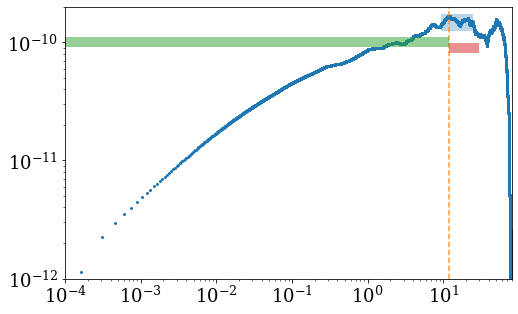

In [23]:
plt.figure(figsize=(8,5))

plt.plot(popc_all.times/1e3, popc_all[thistemp+'-mean'],ms=4,linestyle='', marker='.')

# plt.axvline(popc_all.times[lefts[bestleft]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
#             linewidth = 5, label='averaging region')
# plt.axvline(popc_all.times[rights[bestright]]/1e3, ymin=0.5, ymax = 0.6, c='#44dd44',
#             linewidth = 5, )

plt.axvline(popc_all.times[peak_index]/1e3, label='peak', c='C1', alpha=0.8, ls='--')
# plt.axvline(popc_all.times[len(popc_all.times)//10]/1e3, c='b')
# plt.axvline(popc_all.times[len(popc_all.times)//5]/1e3, c='r')
plt.plot([popc_all.times[lefts[0]]/1e3, popc_all.times[lefts[-1]]/1e3], [10e-11,10e-11], c='C2', 
         linewidth = 10, alpha = 0.5, label = 'possible starts', solid_capstyle='butt')
plt.plot([popc_all.times[rights[0]]/1e3, popc_all.times[rights[-1]]/1e3], [9e-11,9e-11], c='C3', 
         linewidth = 10, alpha = 0.5, label = 'possible ends', solid_capstyle='butt')

# plt.plot([popc_all.times[lefts[bestleft]]/1e3, popc_all.times[rights[bestright]]/1e3], [1.5e-10, 1.5e-10],
#         c='C0', linewidth = 60, alpha = 0.2)

le = popc_all.times[lefts[bestleft]]/1e3
ri = popc_all.times[rights[bestright]]/1e3
to = 1.75e-10
bo = 1.25e-10

rect = matplotlib.patches.Rectangle((le, bo),ri-le,to-bo, facecolor='C0', alpha = 0.3, label='averaging region')
plt.gca().add_patch(rect)

# plt.xlim(-1000,71000)
plt.xscale('log')
plt.xlim(.0001,80)

plt.ylim(0.01e-10,2e-10)
plt.yscale('log')
# plt.ylim(4e-12, 1e-9)
# plt.ylim(0,2e-10)

# plt.legend(loc='upper left')
plt.show()

each datapoint is separated by $0.148 ps$, and the time it takes for the 
autocorrelation function to be essentially zero is $500 ps$, which is 
$\frac{500}{0.148} = 3378$ timesteps.

**I'm using this https://www.researchgate.net/profile/Henrik-Flyvbjerg/publication/258024272_Error_Estimates_on_Averages_of_Correlated_Data/links/0deec52791e24127d8000000/Error-Estimates-on-Averages-of-Correlated-Data.pdf for error estimation**

In [24]:
# window = np.array(popc_all[thistemp+'-mean'][lefts[bestleft]:rights[bestright]])

# max_power = int(np.log2(len(window)))

# sem_approach = np.zeros(max_power)
# std_approach = np.zeros(max_power)

# sem_approach[0] = sp.stats.sem(window)
# std_approach[0] = np.std(window)

# for p in range(max_power):
#     sem_approach[p] = sp.stats.sem(window)
#     std_approach[p] = np.std(window)
#     window = window[:len(window)//2*2]
#     window = window.reshape((len(window)//2,2)).mean(axis=1)

# plt.yscale('log')
# plt.xscale('log')
# plt.plot(2**np.arange(max_power),sem_approach)
# plt.plot(2**np.arange(max_power),std_approach)

In [25]:
test_runslist = popc_all.filter(regex=thistemp+'-r.-visc')
five_avg = np.mean(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
five_std = np.std(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
test_stats = DescrStatsW(five_avg, weights = five_std**-2)
# print("mean", test_stats.mean*1e11)
# print("std", test_stats.std*1e11)
# print("std_mean", test_stats.std_mean*1e11)

print(
    'the viscosity of popc at', thistemp,
#     f'K  is {test_stats.mean*1e11:0.3f} ±',
    f'is {np.mean(popc_all[thistemp+"-mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
    f'{test_stats.std*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
)

cellbell.ding()

the viscosity of popc at 313 is 15.248 ± 5.843 $\times 10^-11 Pa.m.s$


(0.0, 55.0)

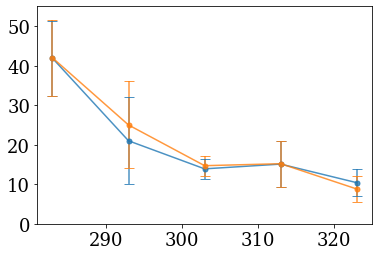

In [26]:
plt.errorbar(
    [283,293,303,313,323],
    [41.9, 21, 13.9, 15.1, 10.4],
    yerr = [9.5, 11, 2.6, 5.8, 3.4],
#     linestyle = "",
    marker = ".", ms=10,
    capsize=5, alpha=0.8
)


plt.errorbar(
    [283,293,303,313,323],
    [42, 25, 14.7, 15.2, 8.8],
    yerr = [9.6, 11, 2.5, 5.8, 3.4],
#     linestyle = "",
    marker = ".", ms=10,
    capsize=5, alpha=0.8
)
plt.ylim(0,55)

In [27]:
# testing = DescrStatsW([1,1,1,1,5], weights = np.array([1,1,1,2,0.1])**-2)
# testing.std
# five_std

In [28]:
# # window = popc_all[temp+"-mean"][lefts[bestleft]:rights[bestright]]
# # rangemin = np.min(window)
# # rangemax = np.max(window)
# # unc = (rangemax-rangemin)/2

# print(
#     'the viscosity of popc at', thistemp,
#     f'K  is {np.mean(popc_all[thistemp+"-mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
#     f'{sem_approach[-1]*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
# )

# from the d\*pc runs
this, theoretically, has already handled the water correction.

In [29]:
lipids = ['dppc', 'dspc', 'dopc', 'dlpc']

In [30]:
test_file = np.load('../dppc/r1/py_output.npz')
test_file.f.arr_0

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [31]:
data = pd.DataFrame()

for lipid in lipids:
    for r in range(1,6):
        filename = f'../{lipid}/r{r}/py_output.npz'
        quick = np.load(filename)
        data[lipid+'-r'+str(r)+'-auto'] = np.array(quick.f.arr_2)
        data[lipid+'-r'+str(r)+'-visc'] = np.array(quick.f.arr_3)
data['times'] = np.array(quick.f.arr_1)
data

,dppc-r1-auto,dppc-r1-visc,dppc-r2-auto,dppc-r2-visc,dppc-r3-auto,dppc-r3-visc,dppc-r4-auto,dppc-r4-visc,dppc-r5-auto,dppc-r5-visc,...,dlpc-r1-visc,dlpc-r2-auto,dlpc-r2-visc,dlpc-r3-auto,dlpc-r3-visc,dlpc-r4-auto,dlpc-r4-visc,dlpc-r5-auto,dlpc-r5-visc,times
0,8069.995960,-1.777004e-12,8091.367941,-1.744103e-12,8092.939389,-1.746696e-12,8076.295164,-1.750448e-12,8095.593922,-1.747940e-12,...,-2.253592e-12,9000.847502,1.520561e-13,9004.292017,-2.219223e-12,9004.658442,-2.205302e-12,8995.805291,-2.251730e-12,0.014
1,573.314028,1.145388e-12,561.388247,1.115943e-12,561.391924,1.114986e-12,568.422241,1.125063e-12,562.745050,1.136177e-12,...,8.026602e-13,805.711653,1.015594e-12,806.314930,7.973326e-13,806.397504,7.793973e-13,816.824285,8.169127e-13,0.162
2,395.448381,2.214584e-12,387.245538,2.152659e-12,388.130110,2.150960e-12,392.054354,2.186730e-12,389.330811,2.185700e-12,...,2.130178e-12,601.084519,1.392622e-12,594.851006,2.112382e-12,592.705469,2.065864e-12,600.085486,2.161353e-12,0.310
3,271.203971,2.851898e-12,264.858137,2.759957e-12,266.679830,2.749046e-12,275.390064,2.824281e-12,266.146482,2.797642e-12,...,3.000794e-12,402.155767,1.638208e-12,398.533694,2.972464e-12,408.067446,2.909648e-12,410.671286,3.047185e-12,0.458
4,119.996744,3.376841e-12,117.454255,3.265884e-12,118.990285,3.253239e-12,122.810541,3.347973e-12,111.796669,3.314847e-12,...,3.741457e-12,226.062008,1.849208e-12,218.059492,3.705947e-12,222.317314,3.632573e-12,223.349132,3.809919e-12,0.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013509,145.499826,-3.817340e-11,1509.444724,-1.168385e-10,-348.089106,6.287420e-11,-715.008416,-1.623821e-10,-1222.120428,-4.523136e-11,...,4.202462e-10,1617.126040,-2.908402e-11,707.983764,-2.221598e-10,148.078010,-2.184125e-09,2802.501204,2.988360e-10,149999.346
1013510,-285.116770,-3.473791e-11,408.255408,-1.151304e-10,-7.158711,6.392710e-11,-1180.156579,-1.656845e-10,871.108716,-4.326705e-11,...,4.209513e-10,2652.239097,-2.793953e-11,521.538652,-2.286998e-10,-1512.414478,-2.184127e-09,910.115205,3.010630e-10,149999.494
1013511,-931.476579,-3.575162e-11,-1194.633230,-1.142311e-10,-524.141108,6.599516e-11,-2514.085527,-1.682184e-10,1538.720616,-4.325178e-11,...,4.224342e-10,-718.658067,-2.656487e-11,3824.042214,-2.311293e-10,-506.924480,-2.182907e-09,-326.323316,2.982178e-10,149999.642
1013512,101.703994,-3.904040e-11,-314.529441,-1.145696e-10,875.762781,6.290505e-11,-956.157648,-1.775821e-10,-3743.854890,-4.065306e-11,...,4.210849e-10,965.504033,-2.629089e-11,2326.166200,-2.337997e-10,-1476.403154,-2.183320e-09,-4200.049173,2.983757e-10,149999.790


In [32]:
# for lipid in lipids:
#     for r in range(1,6):
#         plt.figure(figsize=(4,2))
#         plt.subplot(121)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-auto'])
#         plt.subplot(122)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-visc'])
#         plt.show()

In [33]:
# for lipid in lipids:
#     for r in range(1,6):
#         plt.figure(figsize=(4,2))
#         plt.subplot(121)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-auto'])
#         plt.subplot(122)
#         plt.plot(data.times, data[lipid+'-r'+str(r)+'-visc'])
#         plt.show()

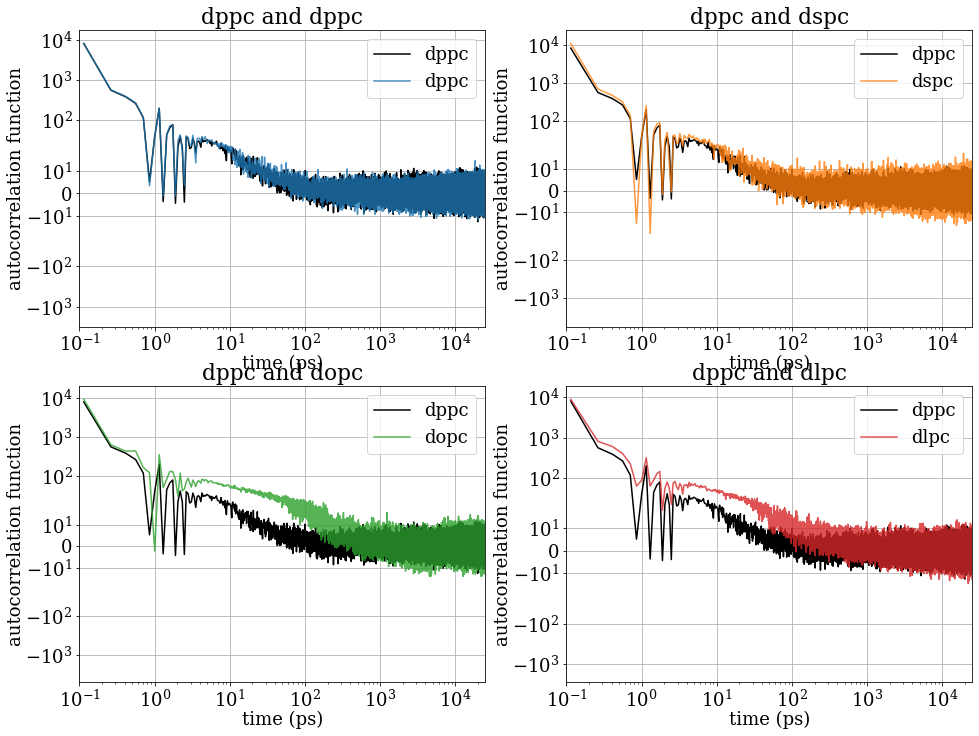

In [34]:
plt.figure(figsize=(16,12))
for l, lipid in enumerate(lipids):
    plt.subplot(2,2,l+1)
    plt.title('dppc and '+lipid)
    plt.plot(data.times+0.1, data['dppc-r2-auto'], c='k', label = 'dppc')
    plt.plot(data.times+0.1, data[lipid+'-r1-auto'], c=f'C{l}', label = lipid, alpha=0.8)
    
#     plt.xlim(0,700000)
    
    ### Lin Y #########
#     plt.ylim(-0.3e-10,2.5e-10)
    ###################
    
    ### Log Y ##########
#     plt.yscale('log')
#     plt.ylim(5e-12,1e-9)
    ####################

#     plt.legend(loc=1)
    plt.xlabel('time (ps)', labelpad=0)
    plt.ylabel('autocorrelation function', labelpad=0)
    
    plt.legend(loc='upper right')
    plt.xlim(0.1, 25e3)
    plt.xscale('log')
    plt.yscale('symlog', linthreshy = 20)
    plt.grid(True)
plt.show()

In [35]:
tails = {
    "dppc" : "16:0 x 2",
    "dspc" : "18:0 x 2",
    "dopc" : "18:1 x 2",
    "dlpc" : "18:2 x 2",
}

In [36]:
for lipid in lipids:
    data[lipid+'-mean'] = np.mean(data.filter(regex=lipid+'-r.-visc'),axis=1)
    data[lipid+'-std'] = np.std(data.filter(regex=lipid+'-r.-visc'),axis=1)

In [37]:
data['dppc-std']

0          1.205767e-14
1          1.175901e-14
2          2.386280e-14
3          3.854682e-14
4          4.708681e-14
               ...     
1013509    7.681832e-11
1013510    7.807617e-11
1013511    7.923556e-11
1013512    8.087851e-11
1013513    8.320437e-11
Name: dppc-std, Length: 1013514, dtype: float64

dppc
	r 1
	r 2
	r 3
	r 4
	r 5
dspc
	r 1
	r 2
	r 3
	r 4
	r 5
dopc
	r 1
	r 2
	r 3
	r 4
	r 5
dlpc
	r 1
	r 2
	r 3
	r 4
	r 5


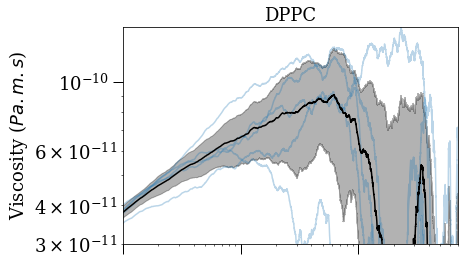

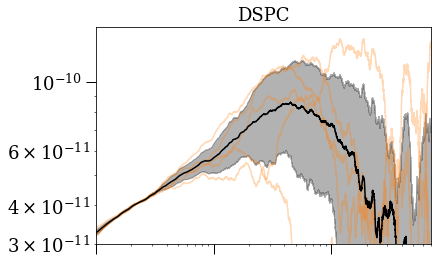

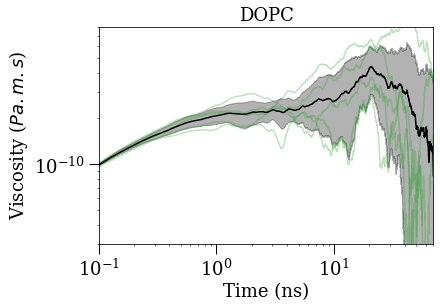

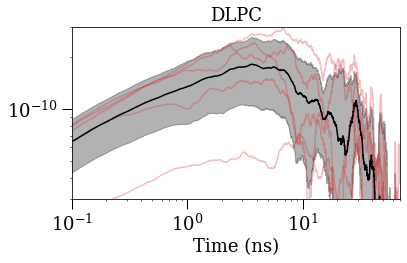

In [124]:
ytops = np.array([1.5,1.5,8,3])*1e-10
plt.figure(figsize=(10,8))
for l, lipid in enumerate(lipids):
    print(lipid)
    plt.subplot(2, 2, l+1)
#     plt.title(lipid+tails[lipid],size=18)
    plt.title(lipid.upper(),size=18)
    for r in range(1,6):
        print('\tr',r)
        plt.plot(data.times/1e3, data[lipid+'-r'+str(r)+'-visc'], alpha=0.3, label=f'r{r}', c=f'C{l}')
    plt.plot(data.times/1e3, data[lipid+'-mean'], c='k', alpha=1)
    plt.fill_between(x = data.times/1e3,
                     y1 = data[lipid+'-mean']+data[lipid+'-std'],
                     y2 = data[lipid+'-mean']-data[lipid+'-std'],
                     color = 'k', alpha=0.3
                    )
    
    plt.xlim(0.1,70)
    
    ### Lin Y #########
    plt.ylim(0.3e-10,ytops[l])
    ###################
    plt.xscale('log')
    plt.yscale('log')
#     if l%2:
#         plt.gca().axes.get_yaxis().set_ticklabels([])
#     else:
#         plt.ylabel('Viscosity ($Pa.m.s$)')

#     plt.gca().axes.get_yaxis().set_ticklabels([])
    if not(l%2):
        plt.ylabel('Viscosity ($Pa.m.s$)')
    
    if 1-l//2:
        plt.gca().axes.get_xaxis().set_ticklabels([])
    else:
        plt.xlabel('Time (ns)')
    plt.gca().axes.tick_params(axis='both', width=1, length=5)

    
plt.subplots_adjust(hspace = 0.2,
                   wspace = 0.05)
plt.savefig('gk-integrals.png', dpi=500)
plt.tight_layout()
plt.show()

dppc
	r 1
	r 2
	r 3
	r 4
	r 5


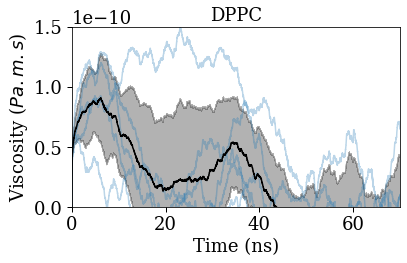

dspc
	r 1
	r 2
	r 3
	r 4
	r 5


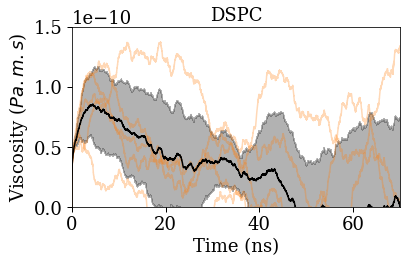

dopc
	r 1
	r 2
	r 3
	r 4
	r 5


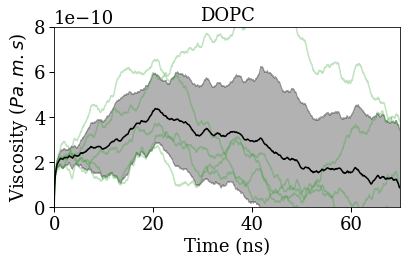

dlpc
	r 1
	r 2
	r 3
	r 4
	r 5


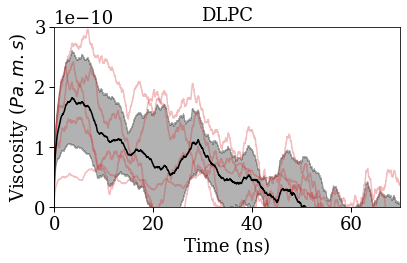

In [127]:
ytops = np.array([1.5,1.5,8,3])*1e-10

for l, lipid in enumerate(lipids):
    print(lipid)
    plt.figure(figsize=(6,4))
#     plt.title(lipid+tails[lipid],size=18)
    plt.title(lipid.upper(),size=18)
    for r in range(1,6):
        print('\tr',r)
        plt.plot(data.times/1e3, data[lipid+'-r'+str(r)+'-visc'], alpha=0.3, label=f'r{r}', c=f'C{l}')
    plt.plot(data.times/1e3, data[lipid+'-mean'], c='k', alpha=1)
    plt.fill_between(x = data.times/1e3,
                     y1 = data[lipid+'-mean']+data[lipid+'-std'],
                     y2 = data[lipid+'-mean']-data[lipid+'-std'],
                     color = 'k', alpha=0.3
                    )
    
    plt.xlim(0,70)
    
    ### Lin Y #########
#     plt.ylim(0.3e-10,ytops[l])
    plt.ylim(0,ytops[l])
    ###################
#     plt.xscale('log')
#     plt.yscale('log')

    
    plt.ylabel('Viscosity ($Pa.m.s$)')
    
    plt.xlabel('Time (ns)')
    plt.gca().axes.tick_params(axis='both', width=1, length=5)
    plt.savefig(f'{lipid}-visc-int.png', dpi=500)
    plt.tight_layout()
    plt.show()

In [93]:
for lipid in lipids:
    print(lipid.upper())

DPPC
DSPC
DOPC
DLPC


.

.

.

.

.

# ------------------------------ 

.

.

.

.

.



## d\*pc averaging window

In [39]:
print(data['times'][1]-data['times'][0])

0.148


In [40]:
data['times'][np.ceil(20000/0.148)]

20000.142

In [41]:
cellbell.ding()

In [42]:
thislipid = 'dopc'
peak_index = np.argmax(data[thislipid+'-mean'][0:int(50000/0.148)])

In [43]:
print('the maximum of',thislipid,'mean is at STEP NUMBER:')
print(peak_index)
print('which is time = ', data.times[peak_index]*1e-3, 'ns')

the maximum of dopc mean is at STEP NUMBER:
138400
which is time =  20.483214 ns


In [44]:
quick_mean = data[thislipid+'-mean']
quick_std = data[thislipid+'-std']

leftl = 0
leftr = min(peak_index, len(quick_mean)//10)

rightl = peak_index
rightr = len(quick_mean)//5

split_into = 100
left_skipping = (leftr-leftl)//split_into
right_skipping = (rightr-rightl)//split_into

sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/left_skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/right_skipping
        )
    )
))

means = np.zeros_like(sems)

print(sems.shape)

for i, start in enumerate(range(leftl, leftr, left_skipping)):
    for j, stop in enumerate(range(rightl, rightr, right_skipping)):
        if i==0: print('j:', j, end=" ")
        if start+3378 < stop:
            stat = DescrStatsW(
                quick_mean[start:stop], 
#                 weights=quick_std[start:stop]**(-2)*np.arange(start,stop)**2
            )
            sems[i,j] = stat.std/(stop-start)
            means[i,j] = stat.mean
        else:
            print('scream')
#     if i%7==0:
    print('i:', i, end=" ")

means = np.ma.masked_equal(means, 0)
sems = np.ma.masked_equal(sems, 0)


(101, 101)
j: 0 j: 1 j: 2 j: 3 j: 4 j: 5 j: 6 j: 7 j: 8 j: 9 j: 10 j: 11 j: 12 j: 13 j: 14 j: 15 j: 16 j: 17 j: 18 j: 19 j: 20 j: 21 j: 22 j: 23 j: 24 j: 25 j: 26 j: 27 j: 28 j: 29 j: 30 j: 31 j: 32 j: 33 j: 34 j: 35 j: 36 j: 37 j: 38 j: 39 j: 40 j: 41 j: 42 j: 43 j: 44 j: 45 j: 46 j: 47 j: 48 j: 49 j: 50 j: 51 j: 52 j: 53 j: 54 j: 55 j: 56 j: 57 j: 58 j: 59 j: 60 j: 61 j: 62 j: 63 j: 64 j: 65 j: 66 j: 67 j: 68 j: 69 j: 70 j: 71 j: 72 j: 73 j: 74 j: 75 j: 76 j: 77 j: 78 j: 79 j: 80 j: 81 j: 82 j: 83 j: 84 j: 85 j: 86 j: 87 j: 88 j: 89 j: 90 j: 91 j: 92 j: 93 j: 94 j: 95 j: 96 j: 97 j: 98 j: 99 j: 100 i: 0 i: 1 i: 2 i: 3 i: 4 i: 5 i: 6 i: 7 i: 8 i: 9 i: 10 i: 11 i: 12 i: 13 i: 14 i: 15 i: 16 i: 17 i: 18 i: 19 i: 20 i: 21 i: 22 i: 23 i: 24 i: 25 i: 26 i: 27 i: 28 i: 29 i: 30 i: 31 i: 32 i: 33 i: 34 i: 35 i: 36 i: 37 i: 38 i: 39 i: 40 i: 41 i: 42 i: 43 i: 44 i: 45 i: 46 i: 47 i: 48 i: 49 i: 50 i: 51 i: 52 i: 53 i: 54 i: 55 i: 56 i: 57 i: 58 i: 59 i: 60 i: 61 i: 62 i: 63 i: 64 i: 65 i: 66 

In [45]:
# # levels = 6

# lefts = np.arange(leftl, leftr, left_skipping)
# rights = np.arange(rightl, rightr, right_skipping)

# plt.figure(figsize=(10, 10))
# plt.title(thislipid)

# # plt.contourf(x, y, means, cmap='Greys_r', levels = 30)
# # plt.colorbar(orientation = 'horizontal', aspect=30)

# plt.contourf(rights, lefts, np.log(sems), cmap='Greys_r', levels = 100)
# plt.colorbar(orientation = 'horizontal', aspect=30)

# plt.xlabel('stopping points')
# plt.ylabel('starting points')

# plt.show()

100 77


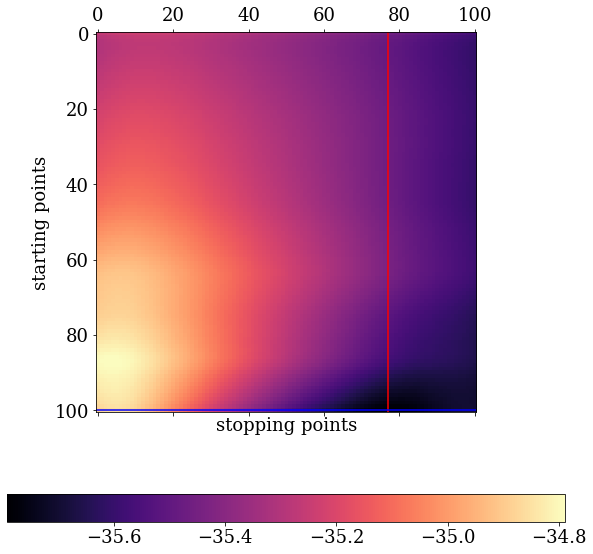

In [46]:
lefts = np.arange(leftl, leftr, left_skipping)
rights = np.arange(rightl, rightr, right_skipping)
bestleft, bestright = np.unravel_index(np.argmin(sems, axis=None), sems.shape)
print(bestleft, bestright)

plt.figure(figsize=(10,10))

plt.matshow(np.log(sems), cmap='magma', fignum=0)
plt.colorbar(orientation = 'horizontal')

plt.axvline(bestright, c='r')
plt.axhline(bestleft,  c='b')

plt.xlabel('stopping points')
plt.ylabel('starting points')

# plt.set_xticks(rights)
# plt.set_yticks(lefts)

plt.show()

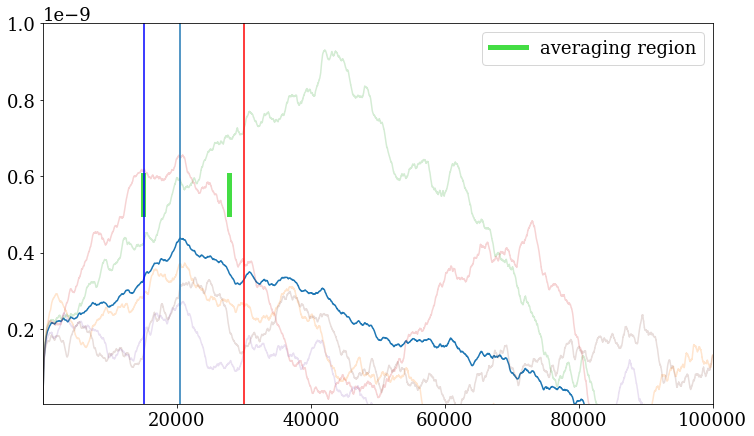

In [47]:
plt.figure(figsize=(12,7))

plt.plot(data.times, data[thislipid+'-mean'])

for r in range(1,6):
    plt.plot(data.times, data[thislipid+'-r'+str(r)+'-visc'], alpha=0.2)

# plt.axvline(data.times[lefts[41]], ymin=0, ymax = 0.1, c='#f34648', label='p=0, 0.5')
# plt.axvline(data.times[rights[0]], ymin=0, ymax = 0.1, c='#f34648')

plt.axvline(data.times[lefts[bestleft]], ymin=0.5, ymax = 0.6, c='#44dd44', linewidth = 5, label='averaging region')
plt.axvline(data.times[rights[bestright]], ymin=0.5, ymax = 0.6, c='#44dd44', linewidth = 5, )

# plt.axvline(data.times[lefts[12]], ymin=0.2, ymax = 0.3, c='#9e8431', label='p=1.5')
# plt.axvline(data.times[rights[21]], ymin=0.2, ymax = 0.3, c='#9e8431')

plt.axvline(data.times[peak_index])
plt.axvline(data.times[len(data.times)//10], c='b')
plt.axvline(data.times[len(data.times)//5], c='r')


# plt.xlim(-1000,71000)
# plt.xscale('log')
plt.xlim(1,1e5)

# plt.ylim(-0.1e-10,2e-10)
# plt.yscale('log')
plt.ylim(4e-12, 1e-9)

plt.legend(loc='upper right')

In [48]:
print(rightl, rightr, rights[bestright])

138400 202702 187911


In [49]:
data.times

0               0.014
1               0.162
2               0.310
3               0.458
4               0.606
              ...    
1013509    149999.346
1013510    149999.494
1013511    149999.642
1013512    149999.790
1013513    149999.938
Name: times, Length: 1013514, dtype: float64

In [50]:
# window = np.array(data[thislipid+'-mean'][lefts[bestleft]:rights[bestright]])

# max_power = int(np.log2(len(window)))

# sem_approach = np.zeros(max_power)
# std_approach = np.zeros(max_power)

# sem_approach[0] = sp.stats.sem(window)
# std_approach[0] = np.std(window)

# for p in range(max_power):
#     sem_approach[p] = sp.stats.sem(window)
#     std_approach[p] = np.std(window)
#     window = window[:len(window)//2*2]
#     window = window.reshape((len(window)//2,2)).mean(axis=1)

# plt.yscale('log')
# plt.xscale('log')
# plt.plot(2**np.arange(max_power),sem_approach)
# plt.plot(2**np.arange(max_power),std_approach)

In [51]:
test_runslist = data.filter(regex=thislipid+'-r.-visc')
five_avg = np.mean(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
five_std = np.std(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
test_stats = DescrStatsW(five_avg, weights = five_std**-2)
# print("mean", test_stats.mean*1e11)
# print("std", test_stats.std*1e11)
# print("std_mean", test_stats.std_mean*1e11)

print(
    'the viscosity of', thislipid,
#     f'K  is {test_stats.mean*1e11:0.3f} ±',
    f'is {np.mean(data[thislipid+"-mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
    f'{test_stats.std*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
)

cellbell.ding()

the viscosity of dopc is 38.736 ± 14.104 $\times 10^-11 Pa.m.s$


In [52]:
# # window = popc_all[temp+"-mean"][lefts[bestleft]:rights[bestright]]
# # rangemin = np.min(window)
# # rangemax = np.max(window)
# # unc = (rangemax-rangemin)/2

# print(
#     'the viscosity of', thislipid,
#     f'is {np.mean(data[thislipid+"-mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
#     f'{np.max([sem_approach[-1],sem_approach[-2]])*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
# )
# cellbell.ding()

In [53]:
lefts[bestleft]-rights[bestright]

-86611

In [54]:
print('dppc: 2.790e-11 Pa•m•s') 
print('dspc: 2.910e-11')
print(len(data['times']), data['times'][1013513])

dppc: 2.790e-11 Pa•m•s
dspc: 2.910e-11
1013514 149999.938


# from the PSM, DMPC runs

In [55]:
dmpc_box_heights = np.array([
    8.34509,
    8.34523,
    8.34752,
    8.34669,
    8.34643
])*1e-9


dmpc_thicknesses = np.array([
    3.7992538071065995e-09, 
    3.8016395939086296e-09,
    3.7984365482233506e-09,
    3.799421319796955e-09,
    3.799974619289341e-09
])


psm_box_heights = np.array([
    10.81383,
    10.92187,
    10.87193,
    10.84212,
    10.87406
])*1e-9

psm_thicknesses = np.array([
    4.239971486761711e-09,
    4.268120162932791e-09,
    4.257152749490834e-09,
    4.24712016293279e-09,
    4.260714867617108e-09
])

$$
\eta_{mem}^{2d} = \frac{H}{h}\eta_{out} - (H-h)\left\{\eta_w^{3d}(T)\right\}
$$

In [56]:
test_in = np.load('../psm/r1/py_output.npz')

In [57]:
test_in.f.arr_0

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [58]:
def watervisc(T):
    """
    Given a temperature in Kelvin, returns a volumetric water viscosity (Pa. sec.)
    """
    return(0.02585147 / (T-214.545586))

In [59]:
watervisc(329), watervisc(311)

(0.0002258669552054148, 0.0002680174906251568)

In [60]:
psm = pd.DataFrame()

times = test_in.f.arr_1

psm_temperature = 329

for r in range(5):
    filename = f'../psm/r{r+1}/py_output.npz'
    temp = np.load(filename)
    psm['r'+str(r+1)+'-auto'] = np.array(temp.f.arr_2) / 1.6e-14 * 2e-15
    psm['r'+str(r+1)+'-visc'] = (
        np.array(temp.f.arr_3)  * psm_box_heights[r]/psm_thicknesses[r]
        - (psm_box_heights[r]-psm_thicknesses[r])*watervisc(psm_temperature)
    ) / 1.6e-14 * 2e-15
psm

,r1-auto,r1-visc,r2-auto,r2-visc,r3-auto,r3-visc,r4-auto,r4-visc,r5-auto,r5-visc
0,1303.870665,3.741200e-13,1300.803162,3.759765e-13,1302.541681,3.750458e-13,1305.054359,3.752012e-13,1301.891596,3.753546e-13
1,-8.804574,3.579860e-12,-11.358050,3.607430e-12,-10.246113,3.605312e-12,-9.168940,3.618465e-12,-10.597510,3.609452e-12
2,54.102580,4.799484e-12,53.169225,4.829529e-12,53.825070,4.834245e-12,54.161404,4.865818e-12,54.140590,4.847306e-12
3,54.454755,5.748002e-12,53.975781,5.785122e-12,54.323982,5.799778e-12,55.583670,5.843179e-12,54.322404,5.817433e-12
4,32.954630,6.546138e-12,32.511607,6.589682e-12,33.754230,6.621454e-12,33.418583,6.665968e-12,33.251201,6.633351e-12
...,...,...,...,...,...,...,...,...,...,...
1010305,-31.150475,-3.625352e-10,114.919218,-1.027963e-09,170.058023,-1.812044e-09,109.928446,1.188278e-09,87.406279,1.634953e-09
1010306,91.193603,-3.639760e-10,68.918358,-1.026496e-09,48.139348,-1.808396e-09,278.310650,1.196981e-09,76.728454,1.635250e-09
1010307,-33.811497,-3.631061e-10,57.100191,-1.030407e-09,31.331215,-1.808288e-09,160.718990,1.210799e-09,-42.816524,1.637520e-09
1010308,-130.333679,-3.623184e-10,90.982516,-1.028271e-09,388.410925,-1.807120e-09,-237.205018,1.213933e-09,-30.249274,1.638069e-09


In [61]:
dmpc8 = pd.DataFrame()
dmpctemp = np.load('../dmpc-8nm/r1/py_output.npz')

dimes = dmpctemp.f.arr_1

dmpc_temperature = 311

# water correction, stepsize correction

for r in range(5):
    filename = f'../dmpc-8nm/r{r+1}/py_output.npz'
    temp = np.load(filename)
    dmpc8['r'+str(r+1)+'-auto'] = np.array(temp.f.arr_2) / 1.6e-14 * 2e-15
    dmpc8['r'+str(r+1)+'-visc'] = (
        np.array(temp.f.arr_3)  * dmpc_box_heights[r]/dmpc_thicknesses[r]
        - (dmpc_box_heights[r]-dmpc_thicknesses[r])*watervisc(dmpc_temperature)
    ) / 1.6e-14 * 2e-15
dmpc8

,r1-auto,r1-visc,r2-auto,r2-visc,r3-auto,r3-visc,r4-auto,r4-visc,r5-auto,r5-visc
0,1994.412588,3.497881e-13,1994.909549,3.497360e-13,1992.944535,3.493584e-13,1992.549304,3.493860e-13,1990.683617,3.489939e-13
1,-56.125211,3.002759e-12,-56.728878,3.005179e-12,-57.590502,2.996002e-12,-55.393511,3.002844e-12,-55.241393,2.991403e-12
2,118.598051,3.950492e-12,118.617843,3.951385e-12,118.579860,3.944216e-12,117.495154,3.940398e-12,116.816602,3.926775e-12
3,32.684033,4.748504e-12,32.312069,4.749605e-12,31.795180,4.727218e-12,33.273276,4.735770e-12,31.469912,4.703768e-12
4,37.704127,5.367071e-12,37.680446,5.372542e-12,37.583615,5.338101e-12,37.770242,5.357584e-12,36.725873,5.304717e-12
...,...,...,...,...,...,...,...,...,...,...
1010305,0.424780,-2.364853e-10,47.233526,-1.806398e-10,68.970569,-2.014709e-11,149.829384,-2.037371e-10,-177.517105,-1.272610e-09
1010306,-239.448530,-2.380284e-10,298.389385,-1.805520e-10,-34.386951,-2.093000e-11,307.927578,-2.036025e-10,171.821652,-1.274839e-09
1010307,118.057406,-2.388217e-10,-59.731619,-1.829160e-10,402.600053,-1.920442e-11,-264.145274,-2.067620e-10,-524.919232,-1.276123e-09
1010308,-507.974649,-2.400502e-10,479.638795,-1.865791e-10,-249.224718,-1.804602e-11,222.597467,-2.024856e-10,139.827450,-1.275015e-09


In [62]:
dmpc_box_heights

array([8.34509e-09, 8.34523e-09, 8.34752e-09, 8.34669e-09, 8.34643e-09])

In [63]:
max([1,5,3,9348])

9348

In [64]:
dmpctemp.f.arr_0

array(['names', 'times', 'xy stress autocorrelation',
       'viscosity at each timestep (from 0)'], dtype='<U35')

In [65]:
times.size

1010310

In [66]:
dimes.size

1010310

In [67]:
psm['mean'] = np.mean([
    psm['r1-visc'], psm['r2-visc'], psm['r3-visc'], psm['r4-visc'], psm['r5-visc'],
], axis=0)

psm['sem'] = stats.sem([
    psm['r1-visc'], psm['r2-visc'], psm['r3-visc'], psm['r4-visc'], psm['r5-visc'],
], axis=0)

In [68]:
dmpc8['mean'] = np.mean([
    dmpc8['r1-visc'], dmpc8['r2-visc'], dmpc8['r3-visc'], dmpc8['r4-visc'], dmpc8['r5-visc'],
], axis=0)

dmpc8['sem'] = stats.sem([
    dmpc8['r1-visc'], dmpc8['r2-visc'], dmpc8['r3-visc'], dmpc8['r4-visc'], dmpc8['r5-visc'],
], axis=0)

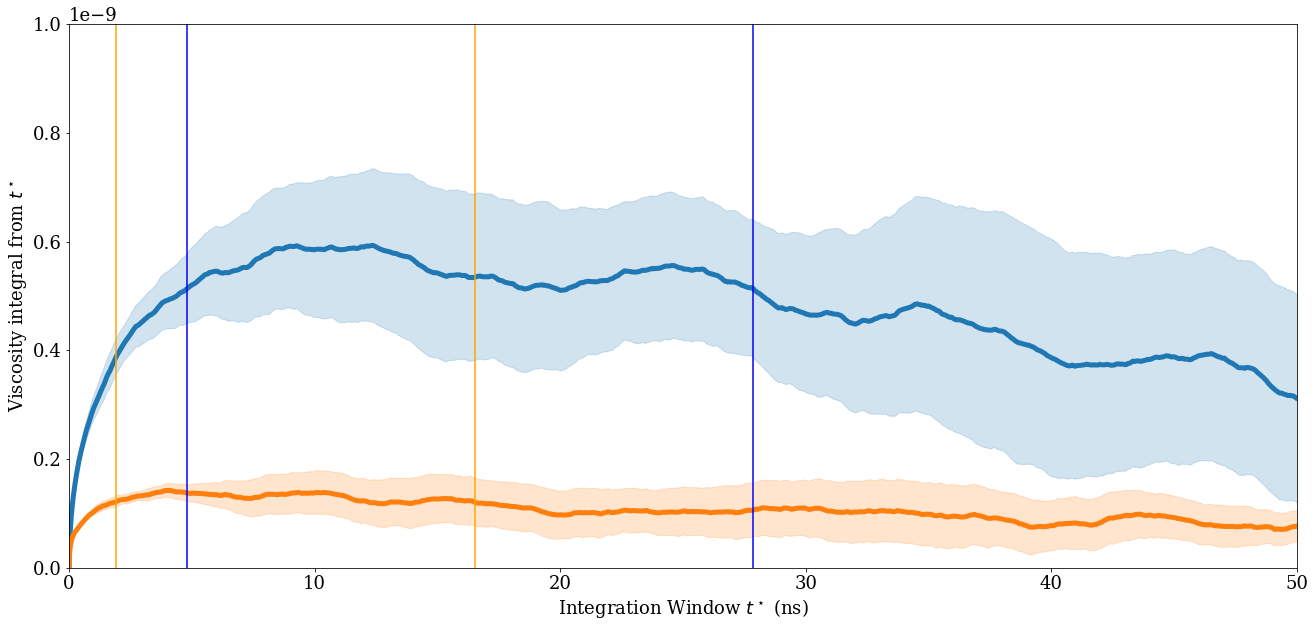

In [69]:
plt.figure(figsize = (22,10))
# for r in range(5):
#     plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=0.1)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, psm['mean'], c='C0', linewidth=5, label='psm')
plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'], y2=psm['mean']-psm['sem'], color='C0', alpha=0.2)

plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

plt.ylim(0,1e-9)
# plt.ylim(0,18e-11) #andrew's limits

plt.xlim(0, 50)

plt.axvline(x=times[24806]*1e-3, c='blue')
plt.axvline(x=times[143603]*1e-3, c='blue')

plt.axvline(x=times[9780]*1e-3, c='orange')
plt.axvline(x=times[85184]*1e-3, c='orange')

plt.xlabel("Integration Window $t^\star$ (ns)")
plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

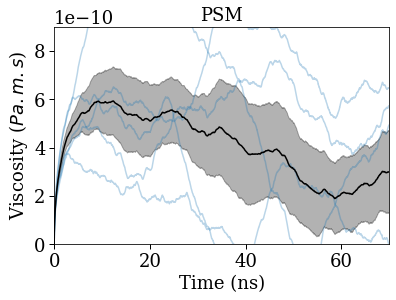

In [132]:
plt.figure(figsize = (6,4))
plt.plot(times/1e3, psm[f'r1-visc'], c='C0', alpha=0.3, label='Individual Simulation')
for r in range(1, 5):
    plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=0.3)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, psm['mean'], c='k', label='Average of all 5')
plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'],
                 y2=psm['mean']-psm['sem'], color='k', alpha=0.3)

# plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

# plt.ylim(0,5e-9)
plt.ylim(0,9e-10)

plt.xlim(0, 70)

plt.title('PSM', size = 18)
# plt.legend(loc="lower right", fontsize = 13)
plt.ylabel('Viscosity ($Pa.m.s$)')

plt.xlabel('Time (ns)')
plt.gca().axes.tick_params(axis='both', width=1, length=5)
plt.savefig(f'psm-visc-int.png', dpi=500)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
#     plt.title(lipid+tails[lipid],size=18)
plt.title(lipid.upper(),size=18)
l=1
for r in range(1,6):
    print('\tr',r)
    plt.plot(data.times/1e3, data[lipid+'-r'+str(r)+'-visc'], alpha=0.3, c=f'C{l}')
plt.plot(data.times/1e3, data[lipid+'-mean'], c='k', alpha=1)
plt.fill_between(x = data.times/1e3,
                 y1 = data[lipid+'-mean']+data[lipid+'-std'],
                 y2 = data[lipid+'-mean']-data[lipid+'-std'],
                 color = 'k', alpha=0.3
                )

plt.xlim(0,70)

### Lin Y #########
#     plt.ylim(0.3e-10,ytops[l])
plt.ylim(0,ytops[l])
###################
#     plt.xscale('log')
#     plt.yscale('log')


plt.ylabel('Viscosity ($Pa.m.s$)')

plt.xlabel('Time (ns)')
plt.gca().axes.tick_params(axis='both', width=1, length=5)
plt.savefig(f'{lipid}-visc-int.png', dpi=500)
plt.show()

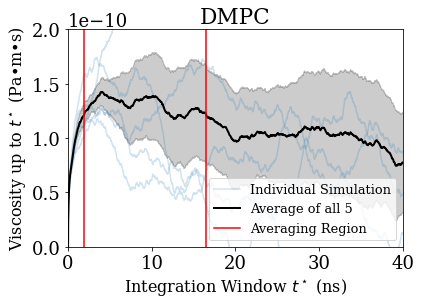

In [133]:
plt.figure(figsize = (6,4))
plt.plot(times/1e3, dmpc8[f'r1-visc'], c='C0', alpha=0.2, label='Individual Simulation')
for r in range(1, 5):
    plt.plot(times/1e3, dmpc8[f'r{r+1}-visc'], c='C0', alpha=0.2)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, dmpc8['mean'], c='k', linewidth=2, label='Average of all 5')
plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='k', alpha=0.2)

# plt.ylim(0,5e-9)
plt.ylim(0,2e-10)

plt.xlim(0, 40)
# plt.xscale('log')

plt.axvline(x=times[9780]*1e-3, c='red', label = 'Averaging Region')
plt.axvline(x=times[85184]*1e-3, c='red')

plt.title('DMPC')
plt.legend(loc="lower right", fontsize = 13)
plt.xlabel("Integration Window $t^\star$ (ns)", size = 16)
plt.ylabel("Viscosity up to $t^\star$ (Pa•m•s)", size = 16)
plt.show()

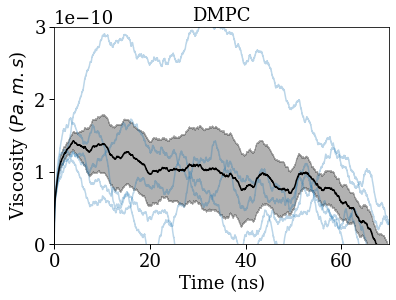

In [137]:
plt.figure(figsize = (6,4))
plt.plot(times/1e3, dmpc8[f'r1-visc'], c='C0', alpha=0.3, label='Individual Simulation')
for r in range(1, 5):
    plt.plot(times/1e3, dmpc8[f'r{r+1}-visc'], c='C0', alpha=0.3)
#     plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=0.1)
    
plt.plot(times/1e3, dmpc8['mean'], c='k', label='Average of all 5')
plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'],
                 y2=dmpc8['mean']-dmpc8['sem'], color='k', alpha=0.3)

# plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

# plt.ylim(0,5e-9)
plt.ylim(0,3e-10)

plt.xlim(0, 70)

plt.title('DMPC', size = 18)
# plt.legend(loc="lower right", fontsize = 13)
plt.ylabel('Viscosity ($Pa.m.s$)')

plt.xlabel('Time (ns)')
plt.gca().axes.tick_params(axis='both', width=1, length=5)
plt.savefig(f'dmpc8-visc-int.png', dpi=500)
plt.show()

In [72]:
dval = np.mean(dmpc8['mean'][9780:85184])
dunc = np.std(dmpc8['mean'][9780:85184])
pval = np.mean(psm['mean'][24806:143603])
punc = np.std(psm['mean'][24806:143603])

print(f'PSM: {pval*1e11:0.1f}±{punc*1e11:0.1f} x10^-11 Pa.m.s')
print(f'DMPC: {dval*1e11:0.1f}±{dunc*1e11:0.1f} x10^-11 Pa.m.s')

PSM: 54.9±2.5 x10^-11 Pa.m.s
DMPC: 13.0±0.7 x10^-11 Pa.m.s


<ErrorbarContainer object of 3 artists>

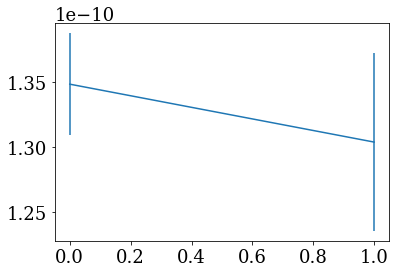

In [73]:
plt.errorbar(x = [0,1], 
             y = [np.mean(dmpc8['mean'][13000:60619]), np.mean(dmpc8['mean'][10000:85619])],
             yerr=[np.std(dmpc8['mean'][13000:60619]), np.std(dmpc8['mean'][10000:85619])]
            )
# plt.ylim(0,1.4e-10)

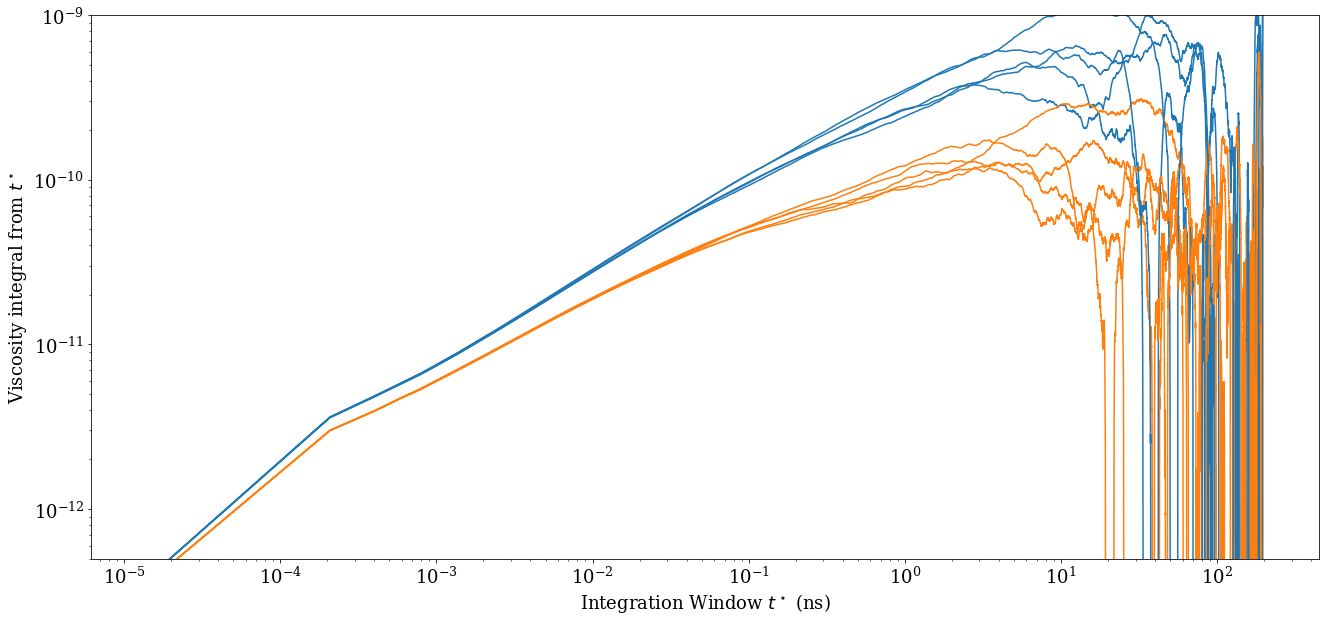

In [74]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-visc'], c='C0', alpha=1)
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-visc'], c='C1', alpha=1)
    
# plt.plot(times/1e3, psm['mean'], c='C0', linewidth=5, label='psm')
# plt.fill_between(times/1e3, y1=psm['mean']+psm['sem'], y2=psm['mean']-psm['sem'], color='C0', alpha=0.2)

# plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

# # plt.ylim(0,5e-9)
# plt.ylim(0,70e-11) #andrew's limits

# plt.xlim(0, 200)

# plt.axvline(x=8, c='lime')
# plt.axvline(x=29.8, c='lime')

# plt.axhline(y=(48.8-1.2)*1e-11, c='blue', label = "Andrew PSM")
# plt.axhline(y=(48.8+1.2)*1e-11, c='blue')

# plt.axhline(y=(12.26-0.5)*1e-11, c='red', label = "Andrew D*PC")
# plt.axhline(y=(19.68+0.69)*1e-11, c='red')


# plt.legend(loc='upper right')

# plt.xlim(1e-3,0.25)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5e-12,1e-9)

plt.xlabel("Integration Window $t^\star$ (ns)")
plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

In [75]:
avgstart = 8000
avgend = 30000
# temp_p = DescrStatsW(fast_psm_mean[start:stop], weights=fast_psm_sem[start:stop]**(-2))
#         temp_d = DescrStatsW(fast_dmpc_mean[start:stop], weights=fast_dmpc_sem[start:stop]**(-2))
#         psm_sems[i,j] = temp_p.std_mean
#         psm_means[i,j] = temp_p.mean
#         dmpc_sems[i,j] = temp_d.std_mean
#         dmpc_means[i,j] = temp_d.mean

psm_visc = DescrStatsW(psm['mean'][avgstart:avgend], weights = psm['sem'][avgstart:avgend]**-2)
print(f'({psm_visc.mean*1e11:0.3f} ± {psm_visc.std*1e11:0.3f})', 'x10^-11 Pa.m.s')

dmpc8_visc = DescrStatsW(dmpc8['mean'][avgstart:avgend], weights = dmpc8['sem'][avgstart:avgend]**-2)
print(dmpc8_visc.mean, ' ± ', dmpc8_visc.std)

(44.298 ± 5.038) x10^-11 Pa.m.s
1.3153193668046055e-10  ±  7.099795180636216e-12


In [76]:
fast_psm_mean = psm['mean']
fast_psm_sem = psm['sem']
fast_dmpc_mean = dmpc8['mean']
fast_dmpc_sem = dmpc8['sem']

.

.

.

# ------------------------------ 

.

.

.


# new method, for psm & dmpc

In [77]:
analyzing = psm

peak_index = np.argmax(analyzing['mean'][0:int(50000/0.148)])

In [78]:
times
dmpc8.columns

Index(['r1-auto', 'r1-visc', 'r2-auto', 'r2-visc', 'r3-auto', 'r3-visc',
       'r4-auto', 'r4-visc', 'r5-auto', 'r5-visc', 'mean', 'sem'],
      dtype='object')

In [79]:
print('the maximum of this one is at STEP NUMBER:', peak_index)
print('this corresponds to t =',times[peak_index]/1e3,'ns')

the maximum of this one is at STEP NUMBER: 63739
this corresponds to t = 12.36538 ns


In [80]:
quick_mean = analyzing['mean']
quick_std = analyzing['sem']

leftl = 0
leftr = min(peak_index, len(quick_mean)//10)

rightl = peak_index
rightr = len(quick_mean)//5

split_into = 100
left_skipping = (leftr-leftl)//split_into
right_skipping = (rightr-rightl)//split_into

sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/left_skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/right_skipping
        )
    )
))

means = np.zeros_like(sems)

print(sems.shape)

for i, start in enumerate(range(leftl, leftr, left_skipping)):
    for j, stop in enumerate(range(rightl, rightr, right_skipping)):
        if i==0: print('j:', j, end=" ")
        if start+3378 < stop:
            stat = DescrStatsW(
                quick_mean[start:stop], 
#                 weights=quick_std[start:stop]**(-2)*np.arange(start,stop)**2
            )
            sems[i,j] = stat.std/(stop-start)
            means[i,j] = stat.mean
        else:
            print('scream')
#     if i%7==0:
    print('i:', i, end=" ")

means = np.ma.masked_equal(means, 0)
sems = np.ma.masked_equal(sems, 0)


(101, 101)
j: 0 j: 1 j: 2 j: 3 j: 4 j: 5 j: 6 j: 7 j: 8 j: 9 j: 10 j: 11 j: 12 j: 13 j: 14 j: 15 j: 16 j: 17 j: 18 j: 19 j: 20 j: 21 j: 22 j: 23 j: 24 j: 25 j: 26 j: 27 j: 28 j: 29 j: 30 j: 31 j: 32 j: 33 j: 34 j: 35 j: 36 j: 37 j: 38 j: 39 j: 40 j: 41 j: 42 j: 43 j: 44 j: 45 j: 46 j: 47 j: 48 j: 49 j: 50 j: 51 j: 52 j: 53 j: 54 j: 55 j: 56 j: 57 j: 58 j: 59 j: 60 j: 61 j: 62 j: 63 j: 64 j: 65 j: 66 j: 67 j: 68 j: 69 j: 70 j: 71 j: 72 j: 73 j: 74 j: 75 j: 76 j: 77 j: 78 j: 79 j: 80 j: 81 j: 82 j: 83 j: 84 j: 85 j: 86 j: 87 j: 88 j: 89 j: 90 j: 91 j: 92 j: 93 j: 94 j: 95 j: 96 j: 97 j: 98 j: 99 j: 100 i: 0 i: 1 i: 2 i: 3 i: 4 i: 5 i: 6 i: 7 i: 8 i: 9 i: 10 i: 11 i: 12 i: 13 i: 14 i: 15 i: 16 i: 17 i: 18 i: 19 i: 20 i: 21 i: 22 i: 23 i: 24 i: 25 i: 26 i: 27 i: 28 i: 29 i: 30 i: 31 i: 32 i: 33 i: 34 i: 35 i: 36 i: 37 i: 38 i: 39 i: 40 i: 41 i: 42 i: 43 i: 44 i: 45 i: 46 i: 47 i: 48 i: 49 i: 50 i: 51 i: 52 i: 53 i: 54 i: 55 i: 56 i: 57 i: 58 i: 59 i: 60 i: 61 i: 62 i: 63 i: 64 i: 65 i: 66 

In [81]:
# # levels = 6

# lefts = np.arange(leftl, leftr, left_skipping)
# rights = np.arange(rightl, rightr, right_skipping)

# plt.figure(figsize=(10, 10))
# # plt.title('psm')

# # plt.contourf(x, y, means, cmap='Greys_r', levels = 30)
# # plt.colorbar(orientation = 'horizontal', aspect=30)

# plt.contourf(rights, lefts, sems, cmap='Greys_r', levels = 100)
# plt.colorbar(orientation = 'horizontal', aspect=30)

# plt.xlabel('stopping points')
# plt.ylabel('starting points')

# plt.show()

67 2


<ipython-input-98-5c983d23a4d3>:9: RuntimeWarning: divide by zero encountered in log
  plt.matshow(np.log(sems), cmap='magma', fignum=0)


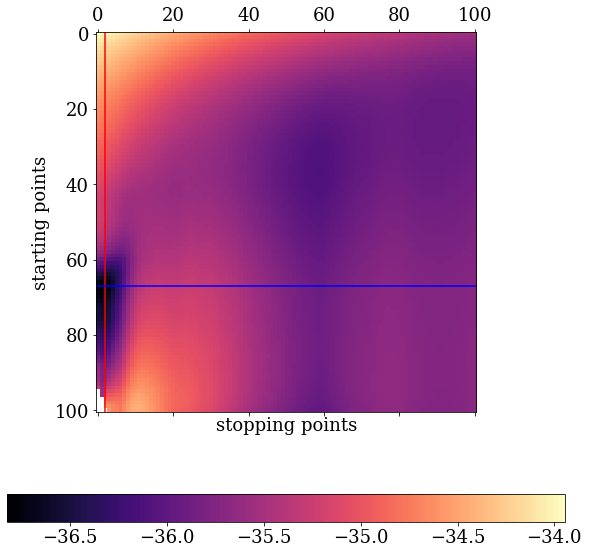

In [98]:
lefts = np.arange(leftl, leftr, left_skipping)
rights = np.arange(rightl, rightr, right_skipping)

bestleft, bestright = np.unravel_index(np.argmin(sems, axis=None), sems.shape)
print(bestleft, bestright)

plt.figure(figsize=(10,10))

plt.matshow(np.log(sems), cmap='magma', fignum=0)
plt.colorbar(orientation = 'horizontal')

plt.xlabel('stopping points')
plt.ylabel('starting points')

plt.axvline(bestright, c='r')
plt.axhline(bestleft,  c='b')

# plt.set_xticks(rights)
# plt.set_yticks(lefts)

plt.show()

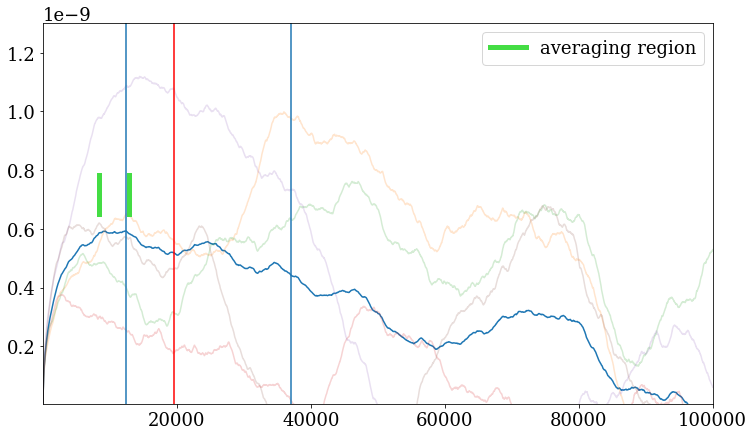

In [99]:
plt.figure(figsize=(12,7))

plt.plot(times, analyzing['mean'])

for r in range(1,6):
    plt.plot(times, analyzing['r'+str(r)+'-visc'], alpha=0.2)

# plt.axvline(data.times[lefts[41]], ymin=0, ymax = 0.1, c='#f34648', label='p=0, 0.5')
# plt.axvline(data.times[rights[0]], ymin=0, ymax = 0.1, c='#f34648')

plt.axvline(times[lefts[bestleft]], ymin=0.5, ymax = 0.6, c='#44dd44', linewidth = 5, label='averaging region')
plt.axvline(times[rights[bestright]], ymin=0.5, ymax = 0.6, c='#44dd44', linewidth = 5, )

# plt.axvline(data.times[lefts[12]], ymin=0.2, ymax = 0.3, c='#9e8431', label='p=1.5')
# plt.axvline(data.times[rights[21]], ymin=0.2, ymax = 0.3, c='#9e8431')

plt.axvline(times[peak_index])
plt.axvline(times[min([peak_index*3])])
plt.axvline(times[len(times)//10], c='r')


# plt.xlim(-1000,71000)
# plt.xscale('log')
plt.xlim(1,1e5)

# plt.ylim(-0.1e-10,2e-10)
# plt.yscale('log')
plt.ylim(4e-12, 1.3e-9)

plt.legend(loc='upper right')

each datapoint is separated by $0.148 ps$, and the time it takes for the 
autocorrelation function to be essentially zero is $500 ps$, which is 
$\frac{500}{0.148} = 3378$ timesteps.

**I'm using this https://www.researchgate.net/profile/Henrik-Flyvbjerg/publication/258024272_Error_Estimates_on_Averages_of_Correlated_Data/links/0deec52791e24127d8000000/Error-Estimates-on-Averages-of-Correlated-Data.pdf for error estimation**

In [100]:
# window = np.array(analyzing['mean'][lefts[bestleft]:rights[bestright]])

# max_power = int(np.log2(len(window)))

# sem_approach = np.zeros(max_power)
# std_approach = np.zeros(max_power)

# sem_approach[0] = sp.stats.sem(window)
# std_approach[0] = np.std(window)

# for p in range(max_power):
#     sem_approach[p] = sp.stats.sem(window)
#     std_approach[p] = np.std(window)
#     window = window[:len(window)//2*2]
#     window = window.reshape((len(window)//2,2)).mean(axis=1)

# plt.yscale('log')
# plt.xscale('log')
# plt.plot(2**np.arange(max_power),sem_approach)
# plt.plot(2**np.arange(max_power),std_approach)

In [101]:
test_runslist = analyzing.filter(regex='r.-visc')
five_avg = np.mean(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
five_std = np.std(test_runslist[lefts[bestleft]:rights[bestright]], axis=0)
test_stats = DescrStatsW(five_avg, weights = five_std**-2)
# print("mean", test_stats.mean*1e11)
# print("std", test_stats.std*1e11)
# print("std_mean", test_stats.std_mean*1e11)

print(
    'the viscosity of this one',
#     f'K  is {test_stats.mean*1e11:0.3f} ±',
    f'is {np.mean(analyzing["mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
    f'{test_stats.std*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
)

cellbell.ding()

the viscosity of this one is 58.800 ± 22.150 $\times 10^-11 Pa.m.s$


In [102]:
print(five_avg, five_std)

r1-visc    6.156411e-10
r2-visc    4.398323e-10
r3-visc    2.742399e-10
r4-visc    1.039532e-09
r5-visc    5.707506e-10
dtype: float64 r1-visc    2.712037e-11
r2-visc    3.265254e-11
r3-visc    1.539533e-11
r4-visc    3.696309e-11
r5-visc    2.310867e-11
dtype: float64


100
200
300
500
800


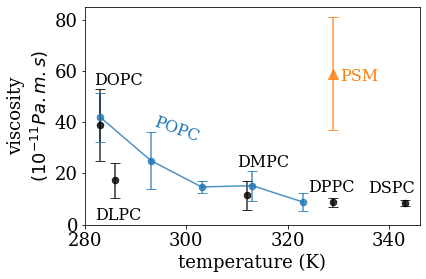

In [139]:
plt.errorbar(
    [283,293,303,313,323],
    [42, 25, 14.7, 15.2, 8.8],
    yerr = [9.6, 11, 2.5, 5.8, 3.4],
#     linestyle = "",
    marker = ".", ms=13,
    capsize=5, alpha=0.8, label = 'popc',
)

plt.errorbar(
    [329, 343, 283, 286, 312],
    [8.7, 8.5, 39, 17.3, 11.4],
    yerr = [1.7, 1.1, 14, 6.8, 5.7],
#     linestyle = "",
    c = "k",
    marker = ".", ms=13,
    capsize=5, alpha=0.8, label = '**pc',
    linestyle = ''
)

size = 16

plt.annotate("DPPC", xy = (329, 8.7), xytext = (-25, 10), xycoords = 'data', textcoords = 'offset points',
            fontsize = size)
plt.annotate("DSPC", xy = (343, 8.5), xytext = (-36, 10), xycoords = 'data', textcoords = 'offset points',
            fontsize = size)
plt.annotate("DOPC", xy = (283, 39),  xytext = (-6, 40),  xycoords = 'data', textcoords = 'offset points',
            fontsize = size)
plt.annotate("DLPC", xy = (286, 17.3),xytext = (-20, -40), xycoords = 'data', textcoords = 'offset points',
            fontsize = size)
plt.annotate("DMPC", xy = (312, 11.4),xytext = (-10, 28), xycoords = 'data', textcoords = 'offset points',
            fontsize = size)

plt.annotate("POPC", xy = (303, 14.7),  xytext = (-50, 45), xycoords = 'data', textcoords = 'offset points',
             rotation = -20,
             color = 'C0',
            fontsize = size)

plt.annotate("PSM", xy = (329, 59),xytext = (7, -7), xycoords = 'data', textcoords = 'offset points',
             color = 'C1',
            fontsize = size)


plt.errorbar(
    [329],
    [59],
    yerr = [22],
#     linestyle = "",
    marker = "^", ms=10,
    capsize=5, alpha=0.8, label = 'psm',
    linestyle = ''
)


plt.ylim(0,85)

# plt.legend(loc='upper right')

# plt.grid(True, alpha=0.2)
plt.xlabel('temperature (K)')
plt.ylabel('viscosity\n$(10^{-11} Pa.m.s)$')

for d in [100,200,300,500,800]:
    print(d)
    plt.savefig('allvisc'+str(d)+'.png', dpi=d)

In [109]:
test = pd.DataFrame()

In [113]:
test['popc'] = [2,5]

In [121]:
test.rename(index = {0:'visc', 1:'err'}, inplace=True)

In [123]:
test.popc.visc

2

In [104]:
popc_temps = np.array([283,293,303,313,323])
popc_viscs = np.array([42, 25, 14.7, 15.2, 8.8])*10**-11
popc_uncs =  np.array([9.6, 11, 2.5, 5.8, 3.4])*10**-11

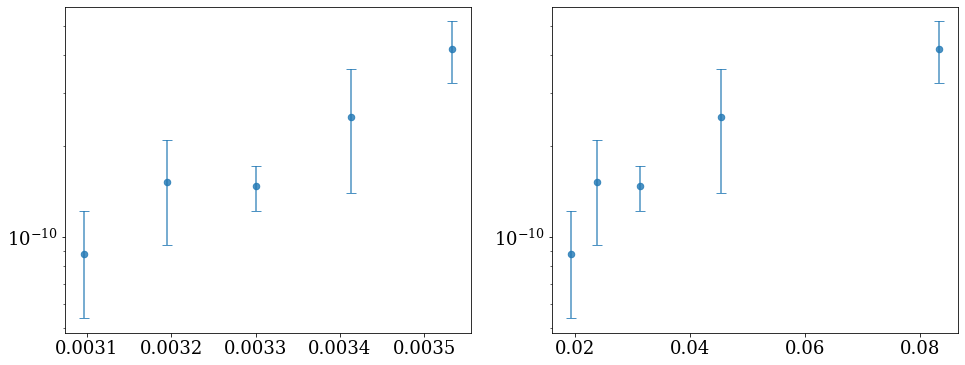

In [105]:
plt.figure(figsize = (16,6))
plt.subplot(121)
plt.errorbar(1/popc_temps, popc_viscs, popc_uncs,
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )
plt.yscale('log')

plt.subplot(122)
plt.errorbar(1/(popc_temps-271), popc_viscs, popc_uncs,
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )
plt.yscale('log')

plt.show()

In [106]:
def arrh(temp, eta_inf, activation_energy, transition_temp):
    return(eta_inf / (temp-0) * np.exp(activation_energy/(temp-transition_temp)))
#     return(eta_inf * np.exp(activation_energy/(temp-transition_temp)))
#     return(transition_temp*eta_inf/(temp-transition_temp) 
#            * np.exp(activation_energy*(-temp+2*transition_temp)/(temp-transition_temp)))


arrh_model = lf.Model(arrh)

In [107]:
params = arrh_model.make_params(eta_inf = 5e-9, activation_energy = 14.8, transition_temp = 270)
# params.add('transition_temp', value = 200, min = 1, max = 282, vary = True)
# params.add('activation_energy', min = 1e-5, value = 1, max=1e10)
# params.add('eta_inf', min = 1e-12, value = 1e-9, max = 1e-8)
params

name,value,initial value,min,max,vary
eta_inf,5.0000e-09,None,-inf,inf,True
activation_energy,14.8000000,None,-inf,inf,True
transition_temp,270.000000,None,-inf,inf,True


In [108]:
result = arrh_model.fit(popc_viscs, params, weights = popc_uncs**-1, temp = popc_temps, calc_covar = True,
                        scale_covar=True,
#                         method='emcee', fit_kws = {'nwalkers' : 7, 'steps' : 50*530}
                        method = 'leastsq'
                       )
result

In [ ]:
covs = result.covar
print(result.covar)
# covs = np.array([
#     [(3.6031e-09)**2, 0.3919, -0.3736],
#     [0.3919, 2.59934942**2, 0.4667],
#     [-0.3736, 0.4667, 11.2095277**2]
#        ])
# covs = (covs+covs.T)/2
# covs

In [ ]:
result.plot_fit()

$\eta(t)\approx A e^{-b/kT}$

In [ ]:
print(result.covar)

In [ ]:
print(result.values)
best = np.array([
    result.values['eta_inf'],
    result.values['activation_energy'],
    result.values['transition_temp']
])

best

In [ ]:
# stdevs = np.sqrt(np.diag(covs))
# stdevs

In [ ]:
# np.random.default_rng().multivariate_normal(best, covs)
np.random.multivariate_normal(best, covs)

In [ ]:
plt.figure(figsize = (10,6))
plt.errorbar(popc_temps, popc_viscs, popc_uncs,
             c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

t = np.arange(275, 340)
fit = arrh(t, *best)

maxea = 0
for i in range(1000):
    eta, ea, tt= np.random.multivariate_normal(best,covs)
    if eta>0 and ea>0 and 0<tt<282:
        plt.plot(t, arrh(t, eta, ea, tt), 'k', alpha = 0.05)
    
plt.plot(t, fit, 'r--')

plt.ylim(5e-11,20e-10)
plt.yscale('log')

# plt.ylim(-1e10,1e9)

plt.title("arrhenius model")
plt.xlabel('Temp (K)')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
plt.figure(figsize = (10,6))
plt.errorbar(1/popc_temps, popc_viscs, popc_uncs,
             c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

t = np.arange(275, 340)
fit = arrh(t, *best,)

maxea = 0
for i in range(1000):
    eta, ea, tt = np.random.multivariate_normal(best,covs)
    if eta>0 and ea>0 and 0<tt<282:
        plt.plot(1/t, arrh(t, eta, ea, tt), 'k', alpha = 0.05)
    
plt.plot(1/t, fit,'r--')

plt.ylim(1e-11,20e-10)
plt.yscale('log')

plt.title("arrhenius model")
plt.xlabel('1/Temp $(K^{-1})$')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
def crex(temp, A, ex, Tc):
    return(A*(Tc/(temp-Tc))**ex)

crex_model = lf.Model(crex)

In [ ]:
c_params = crex_model.make_params(A = 5e-11, ex = 1, Tc = 200)
c_params.add('Tc', value = 200, min = 1, max = 282, vary = True)
# params.add('activation_energy', min = 1e-5, value = 1, max=1e10)
# params.add('eta_inf', min = 1e-12, value = 1e-9, max = 1e-8)
c_params

In [ ]:
c_result = crex_model.fit(popc_viscs, c_params, weights = popc_uncs**-1, temp = popc_temps, scale_covar=True,
                        method = 'leastsq'
                         )
c_result

In [ ]:
c_result.plot_fit()
print(c_result.values)
c_best = np.array([
    c_result.values['A'],
    c_result.values['ex'],
    c_result.values['Tc'],
])

print(c_best)

c_covs = c_result.covar
print(c_covs)

np.random.multivariate_normal(c_best, c_covs)

In [ ]:
plt.figure(figsize = (10,6))
plt.errorbar(popc_temps, popc_viscs, popc_uncs,
             c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

t = np.arange(275, 340)
c_fit = crex(t, *best,)

count = 0
for i in range(1000):
    a, ex, tc = np.random.multivariate_normal(c_best,c_covs)
    if a>0 and 0<tc<282:
        plt.plot(t, crex(t, a, ex, tc), 'k', alpha = 0.01)
    
plt.plot(t, c_fit,'r--')

plt.ylim(1e-11,20e-10)
plt.yscale('log')

plt.title("critical exponent")
plt.xlabel('Temp (K)')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
plt.figure(figsize = (10,6))
plt.errorbar(1/popc_temps, popc_viscs, popc_uncs,
             c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

t = np.arange(275, 340)
c_fit = crex(t, *best,)

count = 0
for i in range(1000):
    a, ex, tc = np.random.multivariate_normal(c_best,c_covs)
    if a>0 and 0<tc<282:
        plt.plot(1/t, crex(t, a, ex, tc), 'k', alpha = 0.01)
    
plt.plot(1/t, c_fit,'r--')

plt.ylim(1e-11,20e-10)
plt.yscale('log')

plt.title("critical exponent")
plt.xlabel('1/Temp (1/K)')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
def wlf(temp, A, C1, C2, Tg):
    return(
        A*np.exp(
            -C1*(temp-Tg)
            /
            (C2+ temp -Tg)
        )
          )

wlf_model = lf.Model(wlf)

In [ ]:
def wlf(temp, A, C1, C2):
    return(
        A*np.exp(
            -C1*(temp-271)
            /
            (C2+ temp -271)
        )
          )

def wlfa(temp, A, C2, Tw):
    return(
        A*np.exp(
            - (temp-Tw)
            /
            (C2+ temp -Tw)
        )
          )

def wlfc(temp, C1, C2, Tw):
    return(
        np.exp(
            - C1 * (temp-Tw)
            /
            (C2+temp-Tw)
        )
          )


wlf_model  = lf.Model(wlf)
wlfa_model = lf.Model(wlfa)
wlfc_model = lf.Model(wlfc)

In [ ]:
w_params = wlf_model.make_params(A = 1e-10, C1 = 10, C2 = 50)
# w_params.add('A', value = 1e-10, min = 0, max = 1)
# w_params.add('Tw', value = 200, max = 282, min = 0)
w_params

wa_params = wlfa_model.make_params(A = 1e-10, C2 = 50, Tw = 200)
wa_params.add('A', value = 1e-10, min = 0, max = 1)
wa_params.add('Tw', value = 200, max = 282, min = 0)
wa_params

wc_params = wlfc_model.make_params(C1 = 10, C2 = 50, Tw = 200)
wc_params.add('Tw', value = 200, max = 282, min = 0)
wc_params

In [ ]:
wm_params = wlf_model.make_params(A = 1e-10, C1 = 10, C2 = 50)
wm_params.add('A', value = 1e-10, min = 0, max = 1)
wm_params.add('Tg', value = 271, vary=False)
wm_params

In [ ]:
w0_params = wlf_model.make_params(A = 1e-10, C1 = 10, C2 = 50)
w0_params.add('A', value = 1e-10, min = 0, max = 1)
w0_params.add('Tg', value = 0, vary=False)
w0_params

In [ ]:
wm_result = wlf_model.fit(popc_viscs, wm_params, weights = popc_uncs**-1, temp = popc_temps, scale_covar=True,
                        method = 'leastsq'
                       )
w0_result = wlf_model.fit(popc_viscs, w0_params, weights = popc_uncs**-1, temp = popc_temps, scale_covar=True,
                        method = 'leastsq'
                       )


In [ ]:
wm_result

In [ ]:
w0_result

In [ ]:
w0_result.plot_fit()
wm_result.plot_fit()


In [ ]:
print(wm_result.values)
wm_best = np.array([
    wm_result.values['A'],
    wm_result.values['C1'],
    wm_result.values['C2'],
])

print(wm_best)

wm_covs = wm_result.covar
print(wm_covs)



print(w0_result.values)
w0_best = np.array([
    w0_result.values['A'],
    w0_result.values['C1'],
    w0_result.values['C2'],
])

print(w0_best)

w0_covs = w0_result.covar
print(w0_covs)

In [ ]:
plt.figure(figsize = (10,6))

t = np.arange(275, 340)
wm_fit = wlf(t, *wm_best, 271)
w0_fit = wlf(t, *w0_best, 0)
plt.plot(t, wm_fit, 'C0', label = '$T_g=T_m$')
plt.plot(t, w0_fit, 'C1', label = '$T_g=0$')

plt.errorbar(popc_temps, popc_viscs, popc_uncs, c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

for i in range(1000):
    a, c1, c2 = np.random.multivariate_normal(wm_best, wm_covs)
    if a>0 and c2>-10:
        plt.plot(t, wlf(t, a, c1, c2, 271), 'C0', alpha = 0.01)
    a, c1, c2 = np.random.multivariate_normal(w0_best, w0_covs)
    if a>0:
        plt.plot(t, wlf(t, a, c1, c2, 0), 'C1', alpha = 0.1)
        



##################################################
plt.ylim(5e-11,1e-9)
plt.yscale('log')



plt.legend(loc='upper right')

plt.title("wlf model")
plt.xlabel('Temp $(K)$')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
plt.figure(figsize = (10,6))

t = np.arange(275, 340)
wm_fit = wlf(t, *wm_best, 271)
w0_fit = wlf(t, *w0_best, 0)
plt.plot(1/t, wm_fit, 'C0', label = '$T_g=T_m$')
plt.plot(1/t, w0_fit, 'C1', label = '$T_g=0$')

plt.errorbar(1/popc_temps, popc_viscs, popc_uncs, c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

for i in range(1000):
    a, c1, c2 = np.random.multivariate_normal(wm_best, wm_covs)
    if a>0 and c2>-10:
        plt.plot(1/t, wlf(t, a, c1, c2, 271), 'C0', alpha = 0.01)
    a, c1, c2 = np.random.multivariate_normal(w0_best, w0_covs)
    if a>0:
        plt.plot(1/t, wlf(t, a, c1, c2, 0), 'C1', alpha = 0.1)
        



##################################################
plt.ylim(5e-11,1e-9)
plt.yscale('log')



plt.legend(loc='upper left')

plt.title("wlf model")
plt.xlabel('1/Temp $(K^{-1})$')
plt.ylabel('visc (Pa.m.s)')

In [ ]:
def wlf0(temp, A, C1, C2):
    return(
        A*np.exp(
            -C1*(temp)
            /
            (C2+ temp)
        )
    )


wlf0_model  = lf.Model(wlf0)

In [ ]:
w0_params = wlf0_model.make_params(A = 1e-10, C1 = 10, C2 = 50)
w_params.add('A', value = 1e-10, min = 0, max = 1)
# w_params.add('Tw', value = 200, max = 282, min = 0)
w0_params

In [ ]:
w0_result = wlf0_model.fit(popc_viscs, w0_params, weights = popc_uncs**-1, temp = popc_temps, scale_covar=True,
                        method = 'leastsq'
                       )

In [ ]:
w0_result

In [ ]:
w_result.plot_fit()
w0_result.plot_fit()


In [ ]:
print(w_result.values)
w_best = np.array([
    w_result.values['A'],
    w_result.values['C1'],
    w_result.values['C2'],
])

print(w_best)

w_covs = w_result.covar
print(w_covs)

In [ ]:
plt.figure(figsize = (8,8))


t = np.arange(275, 340)
w_fit = wlf(t, *w_best)
plt.plot(t, w_fit, 'r')
plt.errorbar(popc_temps, popc_viscs, popc_uncs, c='r',
             marker = ".", ms=13,
             capsize=5, alpha=0.8,
             linestyle = ''
            )

maxea = 0
for i in range(1000):
    a, c1, c2 = np.random.multivariate_normal(w_best,w_covs)
    if a>3e-10 and c2>3 and 0<271-c2<283:
        plt.plot(t, wlf(t, a, c1, c2), 'k', alpha = 0.02)
#     if wlf(283, a, c1, c2)<2e-10:
#         plt.plot(c2, wlf(t[0], a, c1, c2), 'r.')
#     else:
#         plt.plot(c2, wlf(t[0], a, c1, c2), 'k.')

# plt.xlim(0,5)
# plt.xscale('log')
# plt.xlim(0.1,20)


##################################################
plt.ylim(5e-11,1e-9)
# plt.yscale('log')

# plt.grid(True)
# plt.ylim(-1e-11,6e-10)
# plt.yscale('log')

In [ ]:
# window = popc_all[temp+"-mean"][lefts[bestleft]:rights[bestright]]
# rangemin = np.min(window)
# rangemax = np.max(window)
# unc = (rangemax-rangemin)/2

print(
    'the viscosity of this one is',
    f'{np.mean(analyzing["mean"][lefts[bestleft]:rights[bestright]])*1e11:0.3f} ±',
    f'{max(sem_approach[-1],sem_approach[-2])*1e11:0.3f} $\\times 10^{-11} Pa.m.s$'
)

# old method
## plateau-search based on standard deviation:
linear fit doesn't really work

In [ ]:
leftl = 9775
leftr = 9785
#dmpc max step: 20619
#psm max step: 51547

rightl = 85180
rightr = 85190
#206186

skipping = 1

psm_sems = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/skipping
        )
    )
))

psm_means = np.zeros_like(psm_sems)
dmpc_sems = np.zeros_like(psm_sems)
dmpc_means = np.zeros_like(psm_sems)

print(psm_sems.shape)

for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if i==0: print('\tj:', j, stop)
        if start < stop:
            temp_p = DescrStatsW(fast_psm_mean[start:stop])     #, weights=fast_psm_sem[start:stop]**(-2))
            temp_d = DescrStatsW(fast_dmpc_mean[start:stop])    #, weights=fast_dmpc_sem[start:stop]**(-2))
            psm_sems[i,j] = temp_p.std_mean
            psm_means[i,j] = temp_p.mean
            dmpc_sems[i,j] = temp_d.std_mean
            dmpc_means[i,j] = temp_d.mean
#     if i%7==0:
    print('i:', i, start)
    
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if start>=stop:
            psm_sems[i,j] = np.mean(psm_sems)
            psm_means[i,j] = np.mean(psm_means)
            dmpc_sems[i,j] = np.mean(dmpc_sems)
            dmpc_means[i,j] = np.mean(dmpc_means)
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if start>=stop:
            psm_sems[i,j] = np.mean(psm_sems)
            psm_means[i,j] = np.mean(psm_means)
            dmpc_sems[i,j] = np.mean(dmpc_sems)
            dmpc_means[i,j] = np.mean(dmpc_means)

In [ ]:
levels = 6

# plt.figure(figsize=(14, 14))
# # plt.subplot(121)
# plt.title('psm')
# plt.contour(psm_sems, cmap='magma', levels = levels)
# # plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(14, 8))
# # plt.subplot(121)
# plt.title('dmpc')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
# # plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
# plt.grid(True)
# plt.show()

plt.figure(figsize=(14, 8))
# plt.subplot(121)
plt.title('dmpc')
plt.contourf(dmpc_means, cmap='viridis', levels = levels)
# plt.colorbar(orientation = 'horizontal', aspect=30)
plt.contour(dmpc_sems, cmap='magma', levels = levels)
# plt.imshow(psm_sems, cmap='magma')
# plt.colorbar(orientation = 'horizontal', aspect=30)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(times/1e3, dmpc8['mean'], c='C1', linewidth=5, label = 'dmpc')
# plt.fill_between(times/1e3, y1=dmpc8['mean']+dmpc8['sem'], y2=dmpc8['mean']-dmpc8['sem'], color='C1', alpha=0.2)

plt.ylim(1.42e-10, 1.43e-10)

plt.xlim(3.8,4.2)


# plt.xlabel("Integration Window $t^\star$ (ns)")
# plt.ylabel("Viscosity integral from $t^\star$")
plt.show()

In [ ]:
looking_ns = 4
for t, time in enumerate(times):
    test = np.absolute(time - looking_ns*1e3)
    if test<0.5:
        print(t, time)

In [ ]:
wc_result

In [ ]:
# thing = np.polyfit(times[leftl:rightr], fast_psm_mean[leftl:rightr], 1, cov=True)

In [ ]:
# print(thing)
# print(thing[0][0])
# print(thing[1][0,0])

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('psm')
plt.imshow(np.log10(psm_z), cmap='magma')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
plt.colorbar(orientation = 'horizontal', aspect=30)

plt.subplot(122)
plt.title('dmpc')
plt.imshow(np.log10(dmpc_z), cmap='magma')
# plt.contour(dmpc_sems, cmap='magma', levels = levels)
plt.colorbar(orientation = 'horizontal', aspect=30)
plt.show()

# plateau-search based on minimizing weighted standard error of the mean

In [ ]:
print(times[74504], times[142368])

In [ ]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-auto']**2, '.-', c='C0', label='psm')
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-auto']**2, '.-' , c='C1', label = 'dmpc')
    
plt.legend(loc='upper right')
plt.xlim(0,0.01)
plt.ylim(1e1,1e7)
plt.yscale('log')

In [ ]:
plt.figure(figsize = (22,10))
for r in range(5):
    plt.plot(times/1e3, psm[f'r{r+1}-auto'], c='C0', alpha=0.2)
    plt.plot(dimes/1e3, dmpc8[f'r{r+1}-auto'], c='C1', alpha=0.2)
    
plt.xlim(-.1,10)
plt.ylim(-3,5)
# plt.yscale('log')

In [ ]:
leftl = 0
leftr = 206186

rightl = 2578
rightr = 206186



skipping = 55000

psm_slopes = np.zeros((
    int(
        np.ceil(
            (leftr-leftl)/skipping
        )
    ), 
    int(
        np.ceil(
            (rightr-rightl)/skipping
        )
    )
))

psm_z = np.zeros_like(psm_slopes)
psm_sig = np.zeros_like(psm_slopes)
dmpc_slopes = np.zeros_like(psm_slopes)
dmpc_z = np.zeros_like(psm_slopes)
dmpc_sig = np.zeros_like(psm_slopes)

print(psm_slopes.shape)

print('\tJjJjJjJjJjJjJj')
for i, start in enumerate(range(leftl, leftr, skipping)):
    for j, stop in enumerate(range(rightl, rightr, skipping)):
        if i==0: print('\t', j, stop)
        if start+6000 < stop:
            temp_p = np.polyfit(times[start:stop], fast_psm_mean[start:stop], 1, cov=True, w=fast_psm_sem[start:stop]*-1)
            temp_d = np.polyfit(dimes[start:stop], fast_dmpc_mean[start:stop], 1, cov=True, w=fast_dmpc_sem[start:stop]*-1)
            
            psm_slopes[i,j] = temp_p[0][0]
#             psm_slopes[j,i] = psm_slopes[i,j]

            psm_sig[i,j] = temp_p[1][0,0] 
    
            psm_z[i,j] = np.abs(temp_p[0][0]/temp_p[1][0,0]) 
#             psm_z[j,i] = psm_z[i,j]
            
            dmpc_slopes[i, j] = temp_d[0][0]
#             dmpc_slopes[j, i] = dmpc_slopes[i, j]
            
            dmpc_z[i,j] = np.abs(temp_d[0][0]/temp_d[1][0,0])
            dmpc_sig[i,j] = temp_d[1][0,0]
#             dmpc_z[j,i] = dmpc_z[i,j]
#     psm_z[i, i] = np.mean(psm_z[i, i:])
#     dmpc_z[i, i] = np.mean(dmpc_z[i, i:])
    print(i, start)


In [ ]:
psm[f'r1-auto'][0], dmpc8[f'r1-auto'][0]

In [ ]:
plt.figure(figsize = (6,5))
l = 5 
lipid = 'dppc'
scolor = 'C'+str(l)
for r in range(5):
    vals = data[lipid+'-r'+str(r+1)+'-visc']
    uncs = data[lipid+'-r'+str(r+1)+'-visc-unc']
    plt.plot(x, vals, ',',c='C0')
    plt.fill_between(x, y1=vals+uncs, y2=vals-uncs, alpha=0.1, color='C0')
plt.title('DPPC, 5 trials')
plt.ylim(-0.5e-9,1.5e-9)
plt.xscale('log', subsx=[2, 3, 4, 5, 6, 7, 8, 9])
plt.axvline(minerr, ls='--', c='black')
plt.xlabel("Integration Window $t^\star$ (s)")
plt.minorticks_on()
plt.ylabel("Viscosity integral from $t^\star$")

# plt.tight_layout()
plt.show()

In [ ]:
dppc_avg = np.average([
    data['dppc-r1-visc'],
    data['dppc-r2-visc'],
    data['dppc-r3-visc'],
    data['dppc-r4-visc'],
    data['dppc-r5-visc']], axis = 0)

dppc_sem = sp.stats.sem([
    data['dppc-r1-visc'],
    data['dppc-r2-visc'],
    data['dppc-r3-visc'],
    data['dppc-r4-visc'],
    data['dppc-r5-visc']], axis = 0)


In [ ]:
# plt.figure(figsize=(12,7))
x = sp.arange(0, 176000, 2)
plt.plot(x*1e-3, data['dppc-r1-visc']*11/3.78, 'C0', lw=1, alpha=0.5, label='Individual Simulation')
for r in range(2,6):
    plt.plot(x*1e-3, data[f'dppc-r{r}-visc']*11/3.78, 'C0', lw=1, alpha=0.5)


plt.plot(x*1e-3, dppc_avg*11/3.78, 'k', lw=3, label='Average of all 5')
plt.fill_between(x*1e-3, (dppc_avg+dppc_sem)*11/3.78,
                 (dppc_avg-dppc_sem)*11/3.78, alpha=0.2, color='k')
plt.ylim(0, 1e-9)
plt.xlim(-0.1,20)

# plt.axhline(1e-10, ls='--', color='k')
plt.title('DMPC 312K\nSampling Rate: 2ps')
# # plt.xscale('log')

# plt.axvline(3000, c='r', label='Averaging Region')
# plt.axvline(10000, c='r')

plt.ylabel('Viscosity (Pa.m.s)', fontsize=16)
# plt.legend(fontsize=12, loc=1)
plt.xlabel('$t^*$ (ns)', fontsize=16)


# plt.grid(False)
plt.show()

In [ ]:
# sp.array(data[lipid+'-r'+str(r+1)+'-visc'])

# roll-unc
I've realized I calculated the rolling uncertainties slightly incorrectly.\
I can fix that using the other columns that I have though, so that's cool.\
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [ ]:
print('This is no longer needed')
# import time
# lipids1 = ['dopc-293','dopc-303','dopc-313','dopc-323','dmpc','dppc','sopc','popc']
# for lipid in lipids1:
#     for r in range(5):
#         visc = sp.array(data[lipid+'-r'+str(r+1)+'-visc'])
#         print('v')
#         weights = sp.array(data[lipid+'-r'+str(r+1)+'-visc-unc']**(-2))
#         print('w')
#         start = time.time()
#         data[lipid+'-r'+str(r+1)+'-roll-unc'][2:] = sp.array([
#             (
#                 (
#                     sp.add(sp.average(visc[:n]**2, weights=weights[:n]),
#                     - sp.average(visc[:n], weights = weights[:n])**2)
#                 )
# #                 / (n-1)
#             )**(1/2)
#             for n in range(2, len(visc))
#         ])
#         end = time.time()
#         print(end - start)
#         print(lipid,r)

In [ ]:
for lipid in lipids:
    for r in range(5):
        data[lipid+'-r'+str(r+1)+'-roll-unc'][0:2] = data[lipid+'-r'+str(r+1)+'-roll-unc'][2]

In [ ]:
plt.figure(figsize = (16,6))
y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
y2 = sp.arange(1,len(y1)+1)
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        y1 = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x, y1/y2**(1/2), c=scolor)
    plt.title('Rolling-uncertainty')
#     plt.ylim(5e-14, 2.1e-11)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
y1 = data[lipid+'-r1-roll-unc']
y2 = sp.arange(1,len(y1)+1)



adding = sp.zeros_like(y1)


for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    for r in range(5):
        adding += data[lipid+'-r'+str(r+1)+'-roll-unc']**2
        
plt.figure(figsize = (6,5))

plt.title('Combined $\sigma_{\mu}/\sqrt{n}$')
plt.plot(x, (adding/y2)**(0.5))
#     plt.ylim(5e-14, 2.1e-11)
plt.ylabel('Visocity Uncertainty $(10^{-12}$ Pa m s)')
plt.xlabel('Integration Limit (s)')
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.show()
print('minimum is at $\\tau=$', x[((adding/y2)**(0.5)).idxmin()])

In [ ]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    scolor = 'C'+str(l)
    plt.subplot(2,4,l+1)
    for r in range(5):
        vals = data[lipid+'-r'+str(r+1)+'-roll']
        errs = data[lipid+'-r'+str(r+1)+'-roll-unc']
        plt.plot(x,vals, ',', c=scolor)
        plt.fill_between(x, vals+errs, vals-errs, color=scolor, alpha=0.1)
    plt.title(lipid)
    plt.axvline(minerr, ls='--', c='black')
    plt.ylim(1.5e-10,4.2e-10)
    plt.xscale('log')
plt.show()

Once again, that's
$$s_{wtd} = \sqrt{\left(    \frac{\sum_{i=1}^n w_ix_i^2}{\sum_{i=1}^n w_i} - \left(    \bar x_{wtd}    \right)^2   \right)\frac{1}{n-1}}$$

In [ ]:
averaged_viscs = pd.DataFrame()

for lipid in lipids:
    viscs = sp.array([data[lipid+'-r1-roll'], data[lipid+'-r2-roll'], data[lipid+'-r3-roll'],
                      data[lipid+'-r4-roll'], data[lipid+'-r5-roll']])
    weights = sp.array([data[lipid+'-r1-roll-unc'], data[lipid+'-r2-roll-unc'], data[lipid+'-r3-roll-unc'],
                      data[lipid+'-r4-roll-unc'], data[lipid+'-r5-roll-unc']])**(-2)
    averaged_viscs[lipid+'-visc'] = sp.average(viscs, weights=weights, axis=0)
    averaged_viscs[lipid+'-unc'] = (
        (
        sp.sum(weights*viscs**2, axis=0)/sp.sum(weights, axis=0)-averaged_viscs[lipid+'-visc']**2
        )/4
    )**(1/2)
averaged_viscs

In [ ]:
plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-visc'])
# plt.xlim(1e-8,1e-7)
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.show()



plt.figure(figsize = (16,6))
for l, lipid in enumerate(lipids):
    plt.plot(x, averaged_viscs[lipid+'-unc'])
plt.xscale('log')
plt.axvline(minerr, ls='--', c='black')
plt.yscale('log')
plt.show()

In [ ]:
plt.figure(figsize = (20,8))
for l, lipid in enumerate(lipids):
    plt.subplot(2,4,l+1)
    vals = averaged_viscs[lipid+'-visc']
    errs = averaged_viscs[lipid+'-unc']
    plt.plot(x,vals, ',', c=scolor)
    plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
    plt.title(lipid)
    plt.ylim(1.7e-10,2.8e-10)
    plt.xscale('log')
    plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
plt.figure(figsize = (6,5))
l=0
lipid='dopc-293'

vals = averaged_viscs[lipid+'-visc']
errs = averaged_viscs[lipid+'-unc']
plt.plot(x,vals, ',', c=scolor)
plt.fill_between(x, vals+errs, vals-errs, alpha=0.2)
plt.title(lipid)
# plt.ylim(1.7e-10,2.8e-10)
plt.xscale('log')
plt.xlabel('Integration Limit $t^\star$')
plt.ylabel('Viscosity $\eta(t^\star)$')
plt.axvline(minerr, ls='--', c='black')
plt.show()

In [ ]:
mindex = int(minerr/2e-12)
mindex

$$\eta\propto \frac{V}{T}\int{}$$

In [ ]:
print(lipids)
yvals = sp.array([averaged_viscs[lipid+'-visc'][mindex] for lipid in lipids])
yerrs = sp.array([averaged_viscs[lipid+'-unc'][mindex] for lipid in lipids])
ylabel= 'Viscosity (Pa m s)'

top = 2.8e-10

##################################################

plt.errorbar(x=lipids,y=yvals,yerr=yerrs, ls='', marker='.', ms=12)
plt.xticks(rotation=90)
plt.ylabel(ylabel)
plt.title('All Lipids')
plt.show()

##################################################

templist = [293,303,313,323]
plt.errorbar(x=templist, y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.xticks(templist)
plt.title('DOPC')
plt.ylim(1.9e-10,top)
plt.xlabel('Temperature $K$')
# plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=['DMPC\n14:0', 'DPPC\n16:0'], y=[yvals[4],yvals[5]],
             yerr=[yerrs[4],yerrs[5]], ls='', marker='.', ms=12)
plt.title('Tail Length')
plt.ylim(1.9e-10,top)
plt.errorbar(x=['POPC\n16:0-18:1','SOPC\n18:0-18:1'], y=[yvals[7],yvals[6]],
             yerr=[yerrs[7],yerrs[6]], ls='', marker='.', ms=12)
plt.ylabel(ylabel)
plt.show()

##################################################

plt.errorbar(x=lipids[:4], y=yvals[:4], yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.errorbar(x=[lipids[6],lipids[6]], y =[yvals[6],yvals[6]],
             yerr =[yerrs[6],yerrs[6]], ls='', marker='.', ms=12)
plt.title('DOPC vs SOPC')
plt.ylim(1.9e-10,top)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.show()

##################################################

zero_uns = [4,5]
one_uns = [7,6]
two_uns = [0,1,2,3]

plt.errorbar(x=lipids[zero_uns], y=yvals[zero_uns], yerr=yerrs[zero_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[one_uns], y=yvals[one_uns], yerr=yerrs[one_uns], ls='', marker='.', ms=12)
plt.errorbar(x=lipids[two_uns], y=yvals[two_uns], yerr=yerrs[two_uns], ls='', marker='.', ms=12)
plt.title('Degree of Unsaturation',pad=28)
plt.legend(['Zero','One','Two'])
plt.ylim(1.9e-10,top)
plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.show()



In [ ]:
print(lipids)
fs = 18

tails = [17.9, 18, 18.1, 18.2, 14, 16, 18, 17]
plt.errorbar(x=tails[:4],y=yvals[:4],yerr=yerrs[:4], ls='', marker='.', ms=12)
plt.text(17.55,2.05e-10,'DOPC',fontsize=fs)

plt.errorbar(x=tails[4],y=yvals[4],yerr=yerrs[4], ls='', marker='.', ms=12)
plt.text(13.9,2.1e-10,'DMPC',fontsize=fs)

plt.errorbar(x=tails[5],y=yvals[5],yerr=yerrs[5], ls='', marker='.', ms=12)
plt.text(15.6,2.08e-10,'DPPC',fontsize=fs)

plt.errorbar(x=tails[6],y=yvals[6],yerr=yerrs[6], ls='', marker='.', ms=12)
plt.text(17.15,2.6e-10,'SOPC',fontsize=fs)

plt.errorbar(x=tails[7],y=yvals[7],yerr=yerrs[7], ls='', marker='.', ms=12)
plt.text(16.15,2.5e-10,'POPC',fontsize=fs)

plt.title("Overall Tail Length",pad=20)
plt.ylabel(ylabel)


plt.show()

In [ ]:
print('this was the old thing')
# plt.errorbar(x = newarr[:,0,2], y = sp.average(newarr[:,:,0],axis=1,weights=newarr[:,:,1]**(-2)), 
#              yerr = sp.sum(newarr[:,:,1]**2,axis=1)**(1/2), 
# #              yerr = sp.stats.sem(newarr[:,:,0],axis=1),
#              ls='', marker='.', ms=12, label='Preliminary Results')
# # plt.plot(newarr[:,:,2], newarr[:,:,0],'s',ms=5)

# # plt.ylim(1.7e-10,3e-10)
# plt.errorbar(295,2.39e-10,yerr=1.25e-11, marker='.',ms=10, label='Final Result Expected Uncertainty')
# # plt.suptitle('DOPC viscosities',size=18,y=1.05)
# plt.title('DOPC viscosities',size=18)
# # plt.title('Results from 12% simulation length',size=15)
# plt.xlabel('Temperature (K)',size=16)
# plt.ylabel('Shear Viscosity ($Pa\cdot m\cdot s$)',size=16)
# plt.legend()
# plt.xticks(size=14)
# plt.yticks(size=14)